<h1><center>Credit Scoring</center></h1>

In [1]:
import pandas as pd
import numpy as np
import category_encoders as ce
import matplotlib.pyplot as plt
from keras.models import Sequential 
from keras.layers import Dense
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))


## EDA

In [3]:
# Load the dataset
data = pd.read_excel('Base_Final_Final.xlsx', sheet_name='Original')

In [4]:
# Take the first rows to explore the data
data.head()

,REGIONAL,ESTADO CIVIL,# CARGAS,NIVEL DE ESTUDIOS,TIPO DE VIVIENDA,EDAD,SEXO,INGRESOS,EGRESOS,AÑO_CREACION,OCUPACION,TIPO DE GARANTÍA,TIPO DEST.,VALOR ORI.PRESTAM,TASA,CALIFICAC,OTROS RUBROS DEUDA,VALOR CUOTA,CUOT_TOT
0,1,Casado,2.0,Secundaria,Vive Con Familia,34.0,Femenino,700.0,530.17,3,Artesano,Pagaré,CT,3000.0,22.17,A1,1.66,156.88,24
1,1,Casado,2.0,Secundaria,Vive Con Familia,34.0,Femenino,700.0,530.17,3,Artesano,Pagaré,CT,3000.0,22.17,A1,0.00,156.88,24
2,1,Casado,2.0,Secundaria,Vive Con Familia,35.0,Femenino,700.0,530.17,3,Artesano,Pagaré,CT,3000.0,22.17,A1,1.55,156.88,24
3,1,Casado,2.0,Secundaria,Vive Con Familia,35.0,Femenino,700.0,530.17,3,Ama De Casa,Pagaré,CT,3000.0,22.17,A1,1.48,156.88,24
4,1,Casado,2.0,Secundaria,Vive Con Familia,35.0,Femenino,700.0,530.17,3,Ama De Casa,Pagaré,CT,3000.0,22.17,A1,1.41,156.88,24


In [5]:
# Describe 
data.describe()

,REGIONAL,# CARGAS,EDAD,INGRESOS,EGRESOS,AÑO_CREACION,VALOR ORI.PRESTAM,TASA,OTROS RUBROS DEUDA,VALOR CUOTA,CUOT_TOT
count,126863.000000,126700.000000,126710.000000,126863.000000,126863.000000,126863.000000,126863.000000,126863.000000,126848.000000,126863.000000,126863.000000
mean,1.497836,1.221618,42.194507,2905.702100,2044.677671,3.229547,8694.760327,21.366844,20.380611,297.650742,39.381798
std,0.653797,1.000052,13.263097,2315.537261,1980.157729,1.392030,6928.536145,1.001125,79.946904,182.267259,13.022025
min,1.000000,0.000000,20.000000,0.000000,0.000000,1.000000,500.000000,18.500000,0.000000,0.000000,5.000000
25%,1.000000,1.000000,31.000000,1305.000000,593.000000,2.000000,4000.000000,20.600000,2.610000,173.380000,26.000000
50%,1.000000,1.000000,41.000000,2181.140000,1358.000000,3.000000,6000.000000,22.170000,5.420000,249.660000,37.000000
75%,2.000000,2.000000,51.000000,3800.000000,2847.500000,4.000000,10000.000000,22.170000,14.120000,374.140000,48.000000
max,3.000000,6.000000,89.000000,60000.000000,41449.200000,5.000000,40000.000000,24.320000,4754.960000,1750.630000,78.000000


In [6]:
data.isnull().sum() 

REGIONAL                0
ESTADO CIVIL          153
# CARGAS              163
NIVEL DE  ESTUDIOS    163
TIPO DE VIVIENDA        0
EDAD                  153
SEXO                  153
INGRESOS                0
EGRESOS                 0
AÑO_CREACION            0
OCUPACION               0
TIPO DE GARANTÍA        0
TIPO DEST.              0
VALOR ORI.PRESTAM       0
TASA                    0
CALIFICAC               0
OTROS RUBROS DEUDA     15
VALOR CUOTA             0
CUOT_TOT                0
dtype: int64

<AxesSubplot: >

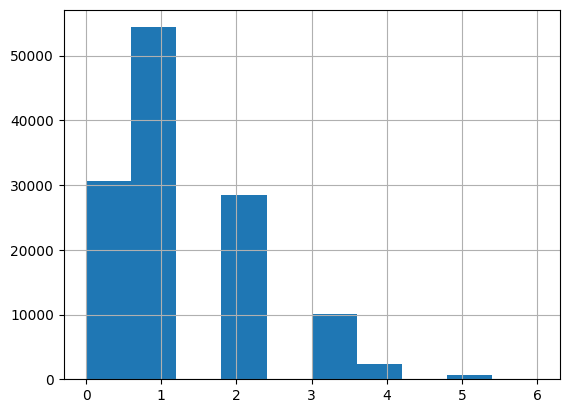

In [7]:
data['# CARGAS'].hist()

In [8]:
data['# CARGAS'].mode()[0]

1.0

In [9]:
null_vals_variables = ['ESTADO CIVIL', '# CARGAS', 'NIVEL DE  ESTUDIOS', 'EDAD', 'SEXO', 'OTROS RUBROS DEUDA']


# Replace the missing values with mode
#null_vals_variables = ['# CARGAS', 'EDAD', 'OTROS RUBROS DEUDA']
for var in null_vals_variables:
    data[var].fillna(data[var].mode()[0], inplace=True)
data.isna().sum()

REGIONAL              0
ESTADO CIVIL          0
# CARGAS              0
NIVEL DE  ESTUDIOS    0
TIPO DE VIVIENDA      0
EDAD                  0
SEXO                  0
INGRESOS              0
EGRESOS               0
AÑO_CREACION          0
OCUPACION             0
TIPO DE GARANTÍA      0
TIPO DEST.            0
VALOR ORI.PRESTAM     0
TASA                  0
CALIFICAC             0
OTROS RUBROS DEUDA    0
VALOR CUOTA           0
CUOT_TOT              0
dtype: int64

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126863 entries, 0 to 126862
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   REGIONAL            126863 non-null  int64  
 1   ESTADO CIVIL        126863 non-null  object 
 2   # CARGAS            126863 non-null  float64
 3   NIVEL DE  ESTUDIOS  126863 non-null  object 
 4   TIPO DE VIVIENDA    126863 non-null  object 
 5   EDAD                126863 non-null  float64
 6   SEXO                126863 non-null  object 
 7   INGRESOS            126863 non-null  float64
 8   EGRESOS             126863 non-null  float64
 9   AÑO_CREACION        126863 non-null  int64  
 10  OCUPACION           126863 non-null  object 
 11  TIPO DE GARANTÍA    126863 non-null  object 
 12  TIPO DEST.          126863 non-null  object 
 13  VALOR ORI.PRESTAM   126863 non-null  float64
 14  TASA                126863 non-null  float64
 15  CALIFICAC           126863 non-nul

Como podemos observar hay un mal procesamiento de la variable # CARGAS esta debe ser interpretada como número entero y no como un número flotante, pero primero nos aseguraremos que los datos son correctos y realmente hayan únicamente número enteros, para ello buscaremos los únicos interpretados como número enteros

In [16]:
data['# CARGAS'].astype(int).unique()

0         2
1         2
2         2
3         2
4         2
         ..
126858    1
126859    1
126860    1
126861    1
126862    1
Name: # CARGAS, Length: 126863, dtype: int64

Como observamos solo hay enteros por lo que procedemos a cambiar el tipo y reasignar al dataset origen

In [20]:
data['# CARGAS'] = data['# CARGAS'].astype(int)

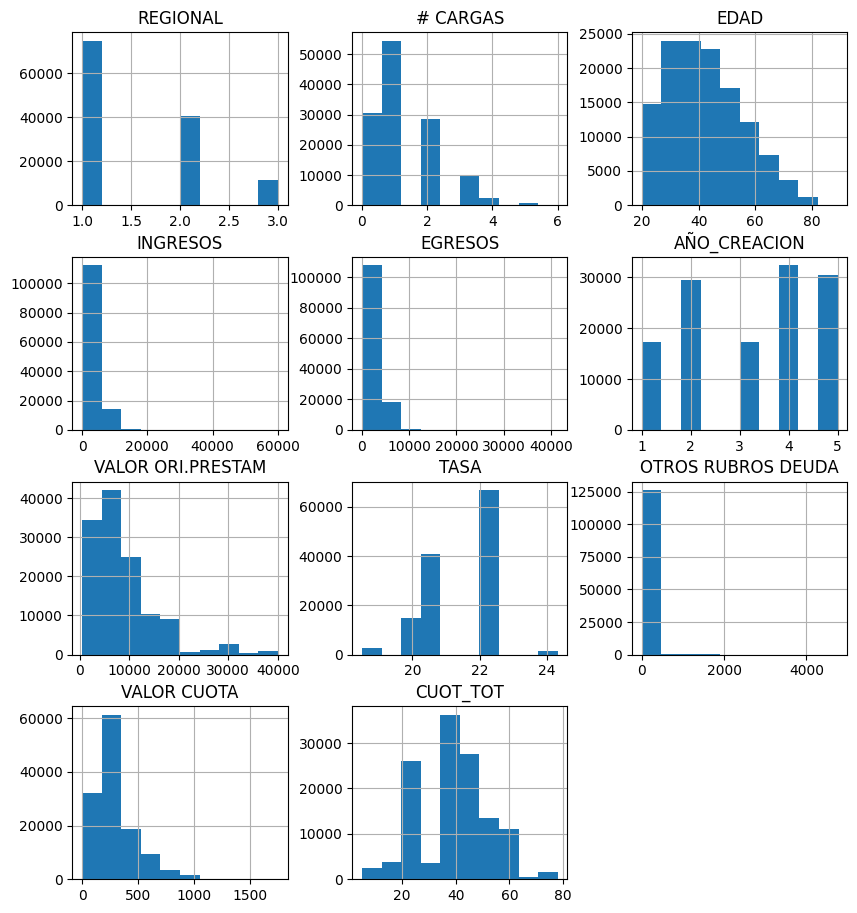

In [21]:
data.hist(grid=True, figsize=(10,11));

In [22]:
print(max(data['INGRESOS']))
print(min(data['INGRESOS']))
print(data['INGRESOS'].mean())

60000.0
0.0
2905.702100488716


In [23]:
variables = data.columns
numeric_variables = data._get_numeric_data().columns
categorical_variables = list(set(variables) - set(numeric_variables))
printmd(f'**Variables in dataset:** {len(variables)}')
printmd(f'**Original quantitative variables:** {len(numeric_variables)}')
print(numeric_variables.to_list())
printmd(f'**Original qualitative variables:** {len(categorical_variables)}')
print(categorical_variables)


**Variables in dataset:** 19

**Original quantitative variables:** 11

['REGIONAL', '# CARGAS', 'EDAD', 'INGRESOS', 'EGRESOS', 'AÑO_CREACION', 'VALOR ORI.PRESTAM', 'TASA', 'OTROS RUBROS DEUDA', 'VALOR CUOTA', 'CUOT_TOT']


**Original qualitative variables:** 8

['TIPO DE GARANTÍA', 'ESTADO CIVIL', 'SEXO', 'CALIFICAC', 'TIPO DEST.', 'NIVEL DE  ESTUDIOS', 'OCUPACION', 'TIPO DE VIVIENDA']


#### Qualitative Variables Encoding

It is time to work with qualitative variables, we can use One Encoder or a Label Encoder, in this case study the
qualitative variables are going to be processed as ordinal variables, because most of them represent an order or hierarchy, so will use Label Encoder with previously defined labels.

In [24]:
#Label encoding for qualitative variables
encoder = ce.OrdinalEncoder(cols=['SEXO', 'TIPO DEST.', 'ESTADO CIVIL', 'TIPO DE VIVIENDA', 'OCUPACION',
                                  'TIPO DE GARANTÍA', 'CALIFICAC', 'NIVEL DE  ESTUDIOS'],
                    return_df=True,
                       mapping=[{
                           'col': 'SEXO',
                           'mapping': {
                               'None': 0,
                               'Femenino': 0,
                               'Masculino': 1
                               }
                           },
                           {
                            'col': 'TIPO DEST.',
                            'mapping':{
                                'None': 0,
                                'AS': 0,
                                'OT': 0,
                                'IF': 1,
                                'II': 1,
                                'CT': 2,
                                'RP': 2,
                                'TE': 3,
                                'TF': 3,
                                'TL': 3,
                                'TO': 3,
                                'TP': 3,
                                'TT': 3
                            }
                           },
                           {
                            'col': 'ESTADO CIVIL',
                            'mapping': {
                                'None': 0,
                                'NA': 0,
                                'Soltero': 0,
                                'Union Libre': 0,
                                'Casado': 1,
                                'Divorciado': 1,
                                'Viudo': 1
                                }
                           },
                           {
                            'col': 'TIPO DE VIVIENDA',
                            'mapping': {
                                'None': 0,
                                'Propia': 0,
                                'Arrendada': 1,
                                'Prestada': 1,
                                'Vive Con Familia': 1
                                }
                           },
                           {
                            'col': 'OCUPACION',
                            'mapping': {
                                'None': 0,
                                'Jubilado': 0,
                                'Acuicultor': 1,
                                'Albañil': 1,
                                'Ama De Casa': 1,
                                'Arrendador': 1,
                                'Artesano': 1,
                                'Barbero': 1,
                                'Carpintero': 1,
                                'Cerrajero ': 1,
                                'Chef / Cocinero Y Afines': 1,
                                'Comerciante': 1,
                                'Conductor / Animador': 1,
                                'Conductor Profesional': 1,
                                'Consultor Profesional': 1,
                                'Consultorias Profesionales': 1,
                                'Contratista': 1,
                                'Cosmetóloga': 1,
                                'Doctor / A': 1,
                                'Electricista': 1,
                                'Estudiante': 1,
                                'Fabricación De Otros Productos De Metal Ncp': 1,
                                'Fabricación de Productos Lácteos': 1,
                                'Faenador / Carnicero': 1,
                                'Ganadero': 1,
                                'Hojalatero': 1,
                                'Horticultor': 1,
                                'Horticultor De Árbol': 1,
                                'Independiente': 1,
                                'Instructor / Capacitador': 1,
                                'Jefe de Área': 1,
                                'Masajista': 1,
                                'Mecánico': 1,
                                'Músico': 1,
                                'Nutricionista': 1,
                                'Panadero / Pastelero': 1,
                                'Peluquero': 1,
                                'Pescador Y Recolector De Productos Del Mar': 1,
                                'Plomero': 1,
                                'Productor De Huevos': 1,
                                'Sastre / Costurera': 1,
                                'Soldador': 1,
                                'Técnico de Audio': 1,
                                'Terapista Y Afines': 1,
                                'Tornero': 1,
                                'Veterinario': 1,
                                'Zapatero': 1,
                                'Analista / Afines': 2,
                                'Asesor Inmobiliario': 2,
                                'Asistentes / Auxiliares /Ayudantes Y Afines': 2,
                                'Atencion Al Cliente': 2,
                                'Bombero': 2,
                                'Cajero': 2,
                                'Conserje / Portero': 2,
                                'Contador': 2,
                                'Despachador / Perchero': 2,
                                'Digitador': 2,
                                'Diseñador Gráfico': 2,
                                'Docente': 2,
                                'Ejecutivo / Afines': 2,
                                'Embasadores / Conservas Y Afines': 2,
                                'Empacador / Cargador': 2,
                                'Empleada Doméstica': 2,
                                'Empleado Privado': 2,
                                'Empleado Público': 2,
                                'Enfermero (A)': 2,
                                'Farmaceuticos  Y Hospitalarios': 2,
                                'Floristería': 2,
                                'Fotografo': 2,
                                'Gerente General': 2,
                                'Guardia de Seguridad': 2,
                                'Jardinero': 2,
                                'Mensajero / Repartidor': 2,
                                'Militar': 2,
                                'Motorista': 2,
                                'Obreros': 2,
                                'Operador De Maquinas De Cultivo / Agricolas': 2,
                                'Otras Actividades De Servicios': 2,
                                'Paramédico': 2,
                                'Periodista': 2,
                                'Policia Nacional': 2,
                                'Publicista': 2,
                                'Quimico Farmaceutico': 2,
                                'Recepcionista / Anfitriona': 2,
                                'Salonero / Barman / Posillero / Similares': 2,
                                'Secretaria / Oficinista': 2,
                                'Subgerencias Y Afines': 2,
                                'Supervisor': 2,
                                'Técnico': 2,
                                'Vendedor / A': 2
                                }
                           },
                           {
                            'col': 'TIPO DE GARANTÍA',
                            'mapping': {
                                'None': 0,
                                'Hipoteca': 0,
                                'Pagaré': 1
                                }
                           },
                           {
                            'col': 'CALIFICAC',
                            'mapping': {
                                'None': 0,
                                'A1': 0,
                                'A2': 0,
                                'A3': 0,
                                'B1': 1,
                                'B2': 1,
                                'C1': 1,
                                'C2': 1,
                                'D': 2,
                                'E': 2,
                                }
                           },
                           {
                            'col': 'NIVEL DE  ESTUDIOS',
                            'mapping': {
                                'None': 0,
                                'NA': 0,
                                'Primaria': 0,
                                'Sin Estudios': 0,
                                'Secundaria': 1,
                                'Técnico': 1,
                                'Postgrado': 2,
                                'Universitaria': 2
                                }
                           },
                       ])

In [25]:
# Encode qualitative variables with defined labels
print(data[['SEXO', 'TIPO DEST.', 'ESTADO CIVIL', 'TIPO DE VIVIENDA', 'OCUPACION', 'TIPO DE GARANTÍA']])
encoded_qualitative_variables = encoder.fit_transform(data[['SEXO', 'TIPO DEST.', 
                                                            'ESTADO CIVIL', 'TIPO DE VIVIENDA',
                                                            'OCUPACION', 'TIPO DE GARANTÍA', 'CALIFICAC', 
                                                            'NIVEL DE  ESTUDIOS']])
print(encoded_qualitative_variables)

             SEXO TIPO DEST. ESTADO CIVIL  TIPO DE VIVIENDA  \
0        Femenino         CT       Casado  Vive Con Familia   
1        Femenino         CT       Casado  Vive Con Familia   
2        Femenino         CT       Casado  Vive Con Familia   
3        Femenino         CT       Casado  Vive Con Familia   
4        Femenino         CT       Casado  Vive Con Familia   
...           ...        ...          ...               ...   
126858  Masculino         TE       Casado            Propia   
126859  Masculino         TE       Casado            Propia   
126860  Masculino         TE       Casado            Propia   
126861  Masculino         TE       Casado            Propia   
126862  Masculino         TE       Casado            Propia   

                    OCUPACION TIPO DE GARANTÍA  
0                    Artesano           Pagaré  
1                    Artesano           Pagaré  
2                    Artesano           Pagaré  
3                 Ama De Casa           Pagaré 

In [26]:
test_range_min = 100
test_range_max = 115
print(data[['SEXO', 'TIPO DEST.', 'ESTADO CIVIL', 'TIPO DE VIVIENDA', 'OCUPACION']][test_range_min:test_range_max])
print(encoded_qualitative_variables[:][test_range_min:test_range_max])

         SEXO TIPO DEST. ESTADO CIVIL TIPO DE VIVIENDA  \
100  Femenino         TE        Viudo           Propia   
101  Femenino         TE        Viudo           Propia   
102  Femenino         TE        Viudo           Propia   
103  Femenino         TE        Viudo           Propia   
104  Femenino         TE        Viudo           Propia   
105  Femenino         TE        Viudo           Propia   
106  Femenino         TE        Viudo           Propia   
107  Femenino         TO      Soltero           Propia   
108  Femenino         TO      Soltero           Propia   
109  Femenino         TO      Soltero           Propia   
110  Femenino         TO      Soltero           Propia   
111  Femenino         TO      Soltero           Propia   
112  Femenino         TO      Soltero           Propia   
113  Femenino         TO      Soltero           Propia   
114  Femenino         TO      Soltero           Propia   

                                       OCUPACION  
100                 

## Data cleaning

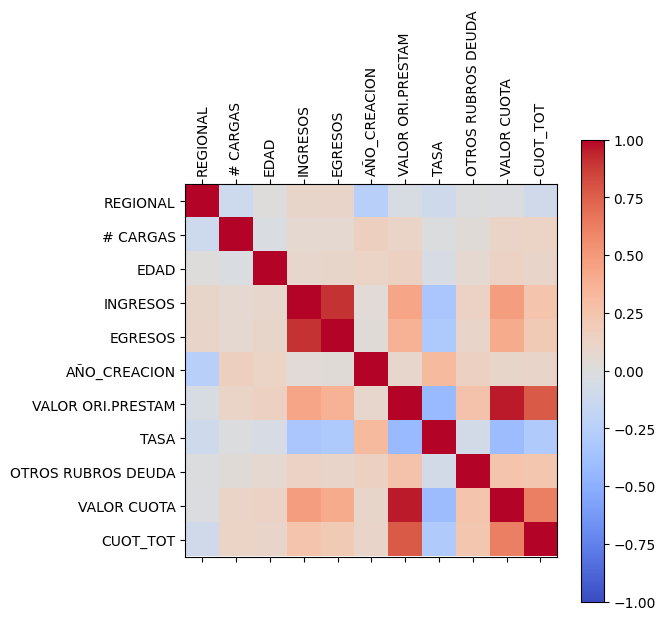

In [27]:
subdata = data[numeric_variables]
corr = subdata.corr(numeric_only=True)
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(subdata.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(subdata.columns)
ax.set_yticklabels(subdata.columns)
plt.show()

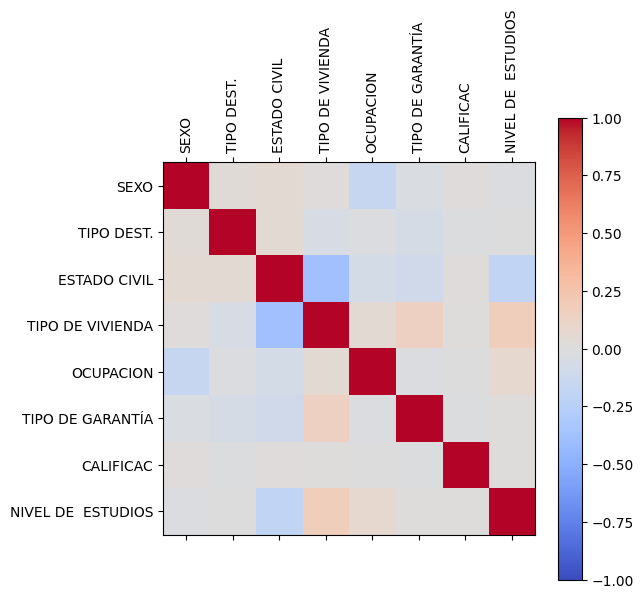

In [28]:
subdata = encoded_qualitative_variables
corr = subdata.corr(numeric_only=True)
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(subdata.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(subdata.columns)
ax.set_yticklabels(subdata.columns)
plt.show()

In [29]:
encoded_qualitative_variables.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126863 entries, 0 to 126862
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   SEXO                126863 non-null  int64  
 1   TIPO DEST.          126863 non-null  int64  
 2   ESTADO CIVIL        126863 non-null  int64  
 3   TIPO DE VIVIENDA    126863 non-null  int64  
 4   OCUPACION           126863 non-null  float64
 5   TIPO DE GARANTÍA    126863 non-null  int64  
 6   CALIFICAC           126863 non-null  int64  
 7   NIVEL DE  ESTUDIOS  126863 non-null  int64  
dtypes: float64(1), int64(7)
memory usage: 7.7 MB


#### Grouping numeric values by range



In [30]:
# Age encoding
edad = data['EDAD'].copy()

edad[ edad<=35 ] = 0
edad[ (edad>35) & (edad<55) ] = 1
edad[ edad>=55 ] = 2

print(edad)

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
126858    1.0
126859    1.0
126860    1.0
126861    1.0
126862    1.0
Name: EDAD, Length: 126863, dtype: float64


In [31]:
# Regional encoding
regional = data['REGIONAL'].copy()
regional[ regional == 1 ] = 0
regional[ regional == 2 ] = 1
regional[ regional == 3 ] = 2
regional

0         0
1         0
2         0
3         0
4         0
         ..
126858    1
126859    1
126860    1
126861    1
126862    1
Name: REGIONAL, Length: 126863, dtype: int64

In [32]:
# CARGAS encoding
cargas = data['# CARGAS'].copy()
cargas[ cargas == 'NA' ] = 0
cargas[ cargas == 0 ] = 0
cargas[ cargas == 1 ] = 1
cargas[ cargas == 2 ] = 1
cargas[ cargas == 3 ] = 1
cargas[ cargas == 4 ] = 1
cargas[ cargas == 5 ] = 1
cargas[ cargas == 6 ] = 1
print(cargas[37:45])

37    0
38    0
39    0
40    1
41    1
42    1
43    1
44    1
Name: # CARGAS, dtype: int64


In [33]:
# Ingresos encoding
ingresos = data['INGRESOS'].copy()
ingresos[ ingresos < 15000 ] = 0
ingresos[ (ingresos >= 15000) & (ingresos < 30000) ] = 1
ingresos[ (ingresos >= 30000) & (ingresos < 45000) ] = 2
ingresos[ (ingresos >= 45000) & (ingresos <= 60000) ] = 3
ingresos

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
126858    0.0
126859    0.0
126860    0.0
126861    0.0
126862    0.0
Name: INGRESOS, Length: 126863, dtype: float64

In [34]:
# Egresos encoding
egresos = data['EGRESOS'].copy()
egresos[ egresos < 10500 ] = 0
egresos[ (egresos >= 10500) & (egresos < 21000) ] = 1
egresos[ (egresos >= 21000) & (egresos < 31500) ] = 2
egresos[ (egresos >= 31500) & (egresos <= 42000) ] = 3
egresos

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
126858    0.0
126859    0.0
126860    0.0
126861    0.0
126862    0.0
Name: EGRESOS, Length: 126863, dtype: float64

<AxesSubplot: >

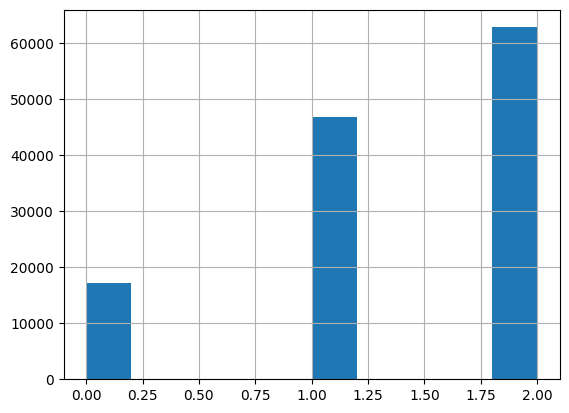

In [35]:
# Año creación encoding
creacion = data['AÑO_CREACION'].copy()
creacion[ creacion == 1 ] = 0
creacion[ (creacion >= 2) & (creacion <= 3)] = 1
creacion[ (creacion >= 4) & (creacion <= 5)] = 2
creacion.hist()

<AxesSubplot: >

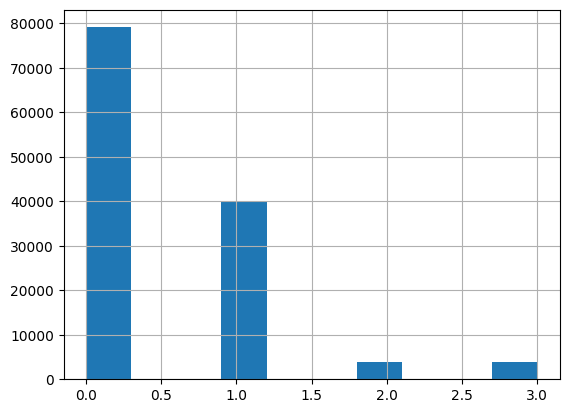

In [36]:
# Valor orig. Prestamo encoding
valor_ori_prestamo = data['VALOR ORI.PRESTAM'].copy()
valor_ori_prestamo[ valor_ori_prestamo < 10000 ] = 0
valor_ori_prestamo[ (valor_ori_prestamo >= 10000) & (valor_ori_prestamo < 20000) ] = 1
valor_ori_prestamo[ (valor_ori_prestamo >= 20000) & (valor_ori_prestamo < 30000) ] = 2
valor_ori_prestamo[ (valor_ori_prestamo >= 30000) & (valor_ori_prestamo <= 40000) ] = 3
valor_ori_prestamo.hist()

<AxesSubplot: >

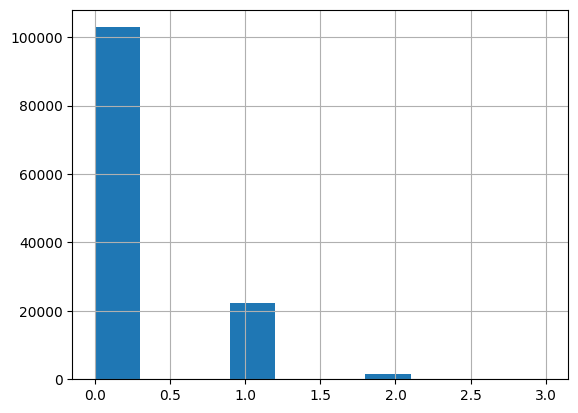

In [37]:
# Valor cuota encoding
valor_cuota = data['VALOR CUOTA'].copy()
valor_cuota[ valor_cuota < 450 ] = 0
valor_cuota[ (valor_cuota >= 450) & (valor_cuota < 900) ] = 1
valor_cuota[ (valor_cuota >= 900) & (valor_cuota < 1350) ] = 2
valor_cuota[ (valor_cuota >= 1350) & (valor_cuota <= 1800) ] = 3
valor_cuota.hist()

<AxesSubplot: >

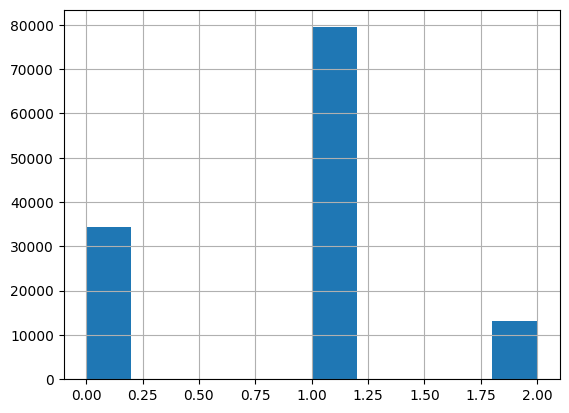

In [38]:
# CUOT_TOT encoding

cuota_total = data['CUOT_TOT'].copy()
cuota_total[ cuota_total < 30 ] = 0
cuota_total[ (cuota_total >= 30) & (cuota_total < 60) ] = 1
cuota_total[ (cuota_total >= 60) & (cuota_total <= 90) ] = 2
cuota_total.hist()

<AxesSubplot: >

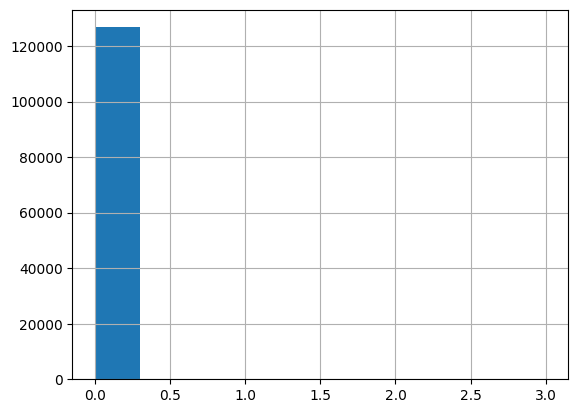

In [39]:
# OTROS RUBROS DEUDA encoding
otros_rubros = data['OTROS RUBROS DEUDA'].copy()
otros_rubros[ otros_rubros < 1250 ] = 0
otros_rubros[ (otros_rubros >= 1250) & (otros_rubros < 2500) ] = 1
otros_rubros[ (otros_rubros >= 2500) & (otros_rubros < 3750) ] = 2
otros_rubros[ (otros_rubros >= 3750) & (otros_rubros <= 5000) ] = 3
otros_rubros.hist()

<AxesSubplot: >

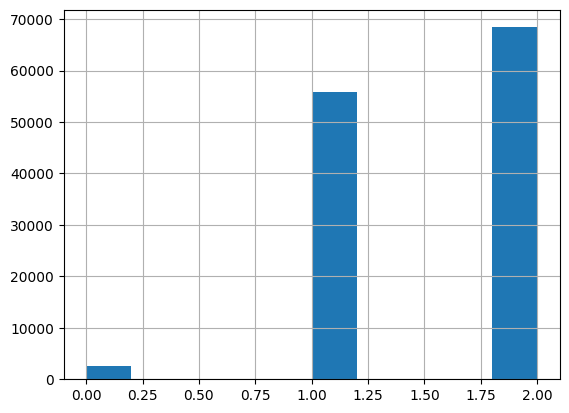

In [40]:
# TASA encoding
tasa = data['TASA'].copy()
tasa[ tasa == 18.50 ] = 0
tasa[ tasa == 19.00 ] = 0
tasa[ tasa == 20.06 ] = 1
tasa[ tasa == 20.60 ] = 1
tasa[ tasa == 21.00 ] = 1
tasa[ tasa == 22.17 ] = 2
tasa[ tasa == 24.32 ] = 2
tasa.hist()

In [41]:
# Replace encoded variables to create the encoded dataset,


# Replace qualitative variables
encoded_dataset = data.copy()
encoded_dataset['SEXO'] = encoded_qualitative_variables['SEXO'] #
encoded_dataset['TIPO DEST.'] = encoded_qualitative_variables['TIPO DEST.'] #
encoded_dataset['ESTADO CIVIL'] = encoded_qualitative_variables['ESTADO CIVIL'] #
encoded_dataset['TIPO DE VIVIENDA'] = encoded_qualitative_variables['TIPO DE VIVIENDA'] #
encoded_dataset['OCUPACION'] = encoded_qualitative_variables['OCUPACION'] #
encoded_dataset['TIPO DE GARANTÍA'] = encoded_qualitative_variables['TIPO DE GARANTÍA'] #
encoded_dataset['CALIFICAC'] = encoded_qualitative_variables['CALIFICAC'] #
encoded_dataset['NIVEL DE  ESTUDIOS'] = encoded_qualitative_variables['NIVEL DE  ESTUDIOS'] #

# Replace gruped numeric values
encoded_dataset['EDAD'] = edad #
encoded_dataset['REGIONAL'] = regional #
encoded_dataset['# CARGAS'] = cargas #
encoded_dataset['INGRESOS'] = ingresos #
encoded_dataset['EGRESOS'] = egresos #
encoded_dataset['AÑO_CREACION'] = creacion #
encoded_dataset['VALOR ORI.PRESTAM'] = valor_ori_prestamo #
encoded_dataset['VALOR CUOTA'] = valor_cuota#
encoded_dataset['CUOT_TOT'] = cuota_total #
encoded_dataset['OTROS RUBROS DEUDA'] = otros_rubros #
encoded_dataset['TASA'] = tasa

encoded_dataset

,REGIONAL,ESTADO CIVIL,# CARGAS,NIVEL DE ESTUDIOS,TIPO DE VIVIENDA,EDAD,SEXO,INGRESOS,EGRESOS,AÑO_CREACION,OCUPACION,TIPO DE GARANTÍA,TIPO DEST.,VALOR ORI.PRESTAM,TASA,CALIFICAC,OTROS RUBROS DEUDA,VALOR CUOTA,CUOT_TOT
0,0,1,1,1,1,0.0,0,0.0,0.0,1,1.0,1,2,0.0,2.0,0,0.0,0.0,0
1,0,1,1,1,1,0.0,0,0.0,0.0,1,1.0,1,2,0.0,2.0,0,0.0,0.0,0
2,0,1,1,1,1,0.0,0,0.0,0.0,1,1.0,1,2,0.0,2.0,0,0.0,0.0,0
3,0,1,1,1,1,0.0,0,0.0,0.0,1,1.0,1,2,0.0,2.0,0,0.0,0.0,0
4,0,1,1,1,1,0.0,0,0.0,0.0,1,1.0,1,2,0.0,2.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126858,1,1,1,1,0,1.0,1,0.0,0.0,1,1.0,1,3,1.0,1.0,0,0.0,0.0,1
126859,1,1,1,1,0,1.0,1,0.0,0.0,1,1.0,1,3,1.0,1.0,0,0.0,0.0,1
126860,1,1,1,1,0,1.0,1,0.0,0.0,1,1.0,1,3,1.0,1.0,0,0.0,0.0,1
126861,1,1,1,1,0,1.0,1,0.0,0.0,1,1.0,1,3,1.0,1.0,0,0.0,0.0,1


In [42]:
encoded_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126863 entries, 0 to 126862
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   REGIONAL            126863 non-null  int64  
 1   ESTADO CIVIL        126863 non-null  int64  
 2   # CARGAS            126863 non-null  int64  
 3   NIVEL DE  ESTUDIOS  126863 non-null  int64  
 4   TIPO DE VIVIENDA    126863 non-null  int64  
 5   EDAD                126863 non-null  float64
 6   SEXO                126863 non-null  int64  
 7   INGRESOS            126863 non-null  float64
 8   EGRESOS             126863 non-null  float64
 9   AÑO_CREACION        126863 non-null  int64  
 10  OCUPACION           126863 non-null  float64
 11  TIPO DE GARANTÍA    126863 non-null  int64  
 12  TIPO DEST.          126863 non-null  int64  
 13  VALOR ORI.PRESTAM   126863 non-null  float64
 14  TASA                126863 non-null  float64
 15  CALIFICAC           126863 non-nul

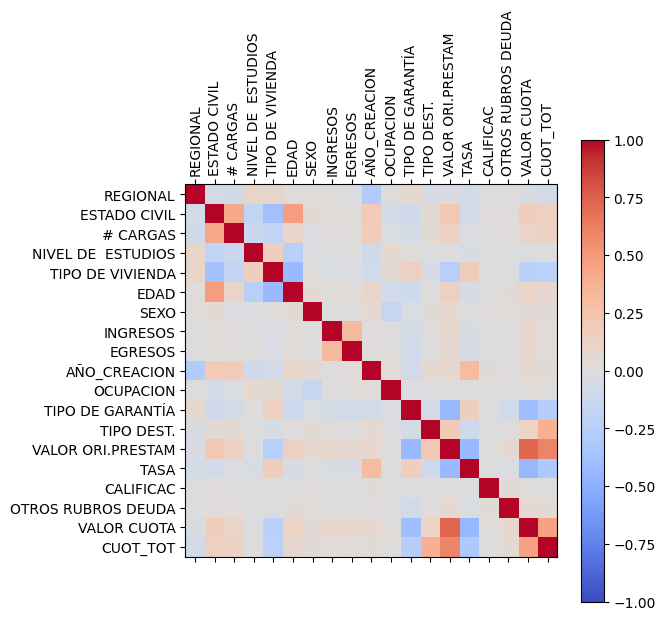

In [43]:
# See correlation of variables after encoding and procesing
subdata = encoded_dataset
corr = subdata.corr()
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(subdata.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(subdata.columns)
ax.set_yticklabels(subdata.columns)
plt.show()

In [44]:
# vif
X = encoded_dataset

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(vif_data)

               feature        VIF
0             REGIONAL   1.766230
1         ESTADO CIVIL   4.024990
2             # CARGAS   5.118600
3   NIVEL DE  ESTUDIOS   1.962144
4     TIPO DE VIVIENDA   3.071055
5                 EDAD   3.334678
6                 SEXO   2.253043
7             INGRESOS   1.126530
8              EGRESOS   1.129812
9         AÑO_CREACION   6.327655
10           OCUPACION   7.585454
11    TIPO DE GARANTÍA  23.906449
12          TIPO DEST.  24.304551
13   VALOR ORI.PRESTAM   3.983580
14                TASA  12.193201
15           CALIFICAC   1.003860
16  OTROS RUBROS DEUDA   1.011110
17         VALOR CUOTA   2.709349
18            CUOT_TOT   5.403193


In [45]:
# Drop highly correlated variable

# detectada en correlación de pearson
encoded_dataset.drop('VALOR CUOTA', axis=1, inplace=True)

# detectado con vif
encoded_dataset.drop('TIPO DE GARANTÍA', axis=1, inplace=True)

Al finalizar todo el proceso podemos ver como tenemos un dataset con todas las variables correctamente categorizadas, todas en formato numérico y sin valores faltantes, con esto tenemos nuestro dataset listo para poder continuar con el entrenamiento

In [46]:
encoded_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126863 entries, 0 to 126862
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   REGIONAL            126863 non-null  int64  
 1   ESTADO CIVIL        126863 non-null  int64  
 2   # CARGAS            126863 non-null  int64  
 3   NIVEL DE  ESTUDIOS  126863 non-null  int64  
 4   TIPO DE VIVIENDA    126863 non-null  int64  
 5   EDAD                126863 non-null  float64
 6   SEXO                126863 non-null  int64  
 7   INGRESOS            126863 non-null  float64
 8   EGRESOS             126863 non-null  float64
 9   AÑO_CREACION        126863 non-null  int64  
 10  OCUPACION           126863 non-null  float64
 11  TIPO DEST.          126863 non-null  int64  
 12  VALOR ORI.PRESTAM   126863 non-null  float64
 13  TASA                126863 non-null  float64
 14  CALIFICAC           126863 non-null  int64  
 15  OTROS RUBROS DEUDA  126863 non-nul

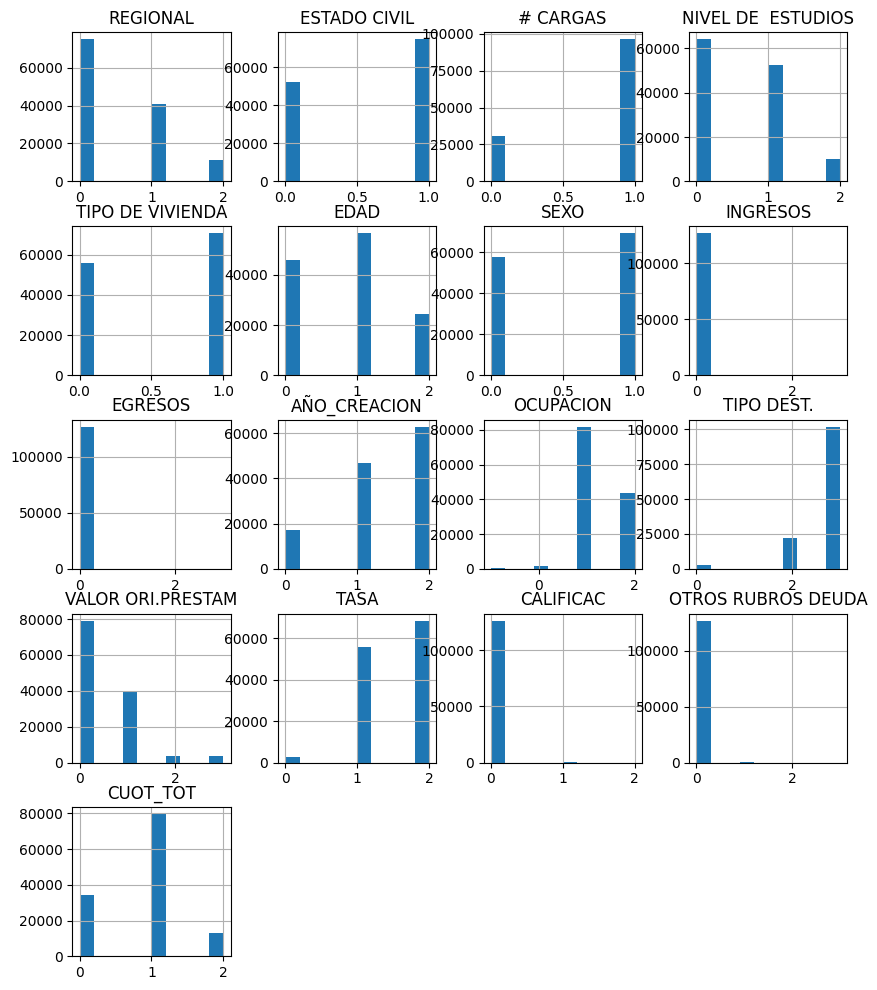

In [47]:
encoded_dataset.hist(grid=True, figsize=(10,12));

In [48]:
# Para poder separar en data de entrenamiento y testeo es necesario que acomodemos la variable objetivo 'CALIFICAC'
temp_calific = encoded_dataset.pop('CALIFICAC')
encoded_dataset.insert(loc=16, column = 'CALIFICAC', value=temp_calific)
encoded_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126863 entries, 0 to 126862
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   REGIONAL            126863 non-null  int64  
 1   ESTADO CIVIL        126863 non-null  int64  
 2   # CARGAS            126863 non-null  int64  
 3   NIVEL DE  ESTUDIOS  126863 non-null  int64  
 4   TIPO DE VIVIENDA    126863 non-null  int64  
 5   EDAD                126863 non-null  float64
 6   SEXO                126863 non-null  int64  
 7   INGRESOS            126863 non-null  float64
 8   EGRESOS             126863 non-null  float64
 9   AÑO_CREACION        126863 non-null  int64  
 10  OCUPACION           126863 non-null  float64
 11  TIPO DEST.          126863 non-null  int64  
 12  VALOR ORI.PRESTAM   126863 non-null  float64
 13  TASA                126863 non-null  float64
 14  OTROS RUBROS DEUDA  126863 non-null  float64
 15  CUOT_TOT            126863 non-nul

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379911 entries, 0 to 379910
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   REGIONAL            379911 non-null  int64  
 1   ESTADO CIVIL        379911 non-null  int64  
 2   # CARGAS            379911 non-null  int64  
 3   NIVEL DE  ESTUDIOS  379911 non-null  int64  
 4   TIPO DE VIVIENDA    379911 non-null  int64  
 5   EDAD                379911 non-null  float64
 6   SEXO                379911 non-null  int64  
 7   INGRESOS            379911 non-null  float64
 8   EGRESOS             379911 non-null  float64
 9   AÑO_CREACION        379911 non-null  int64  
 10  OCUPACION           379911 non-null  float64
 11  TIPO DEST.          379911 non-null  int64  
 12  VALOR ORI.PRESTAM   379911 non-null  float64
 13  TASA                379911 non-null  float64
 14  OTROS RUBROS DEUDA  379911 non-null  float64
 15  CUOT_TOT            379911 non-nul

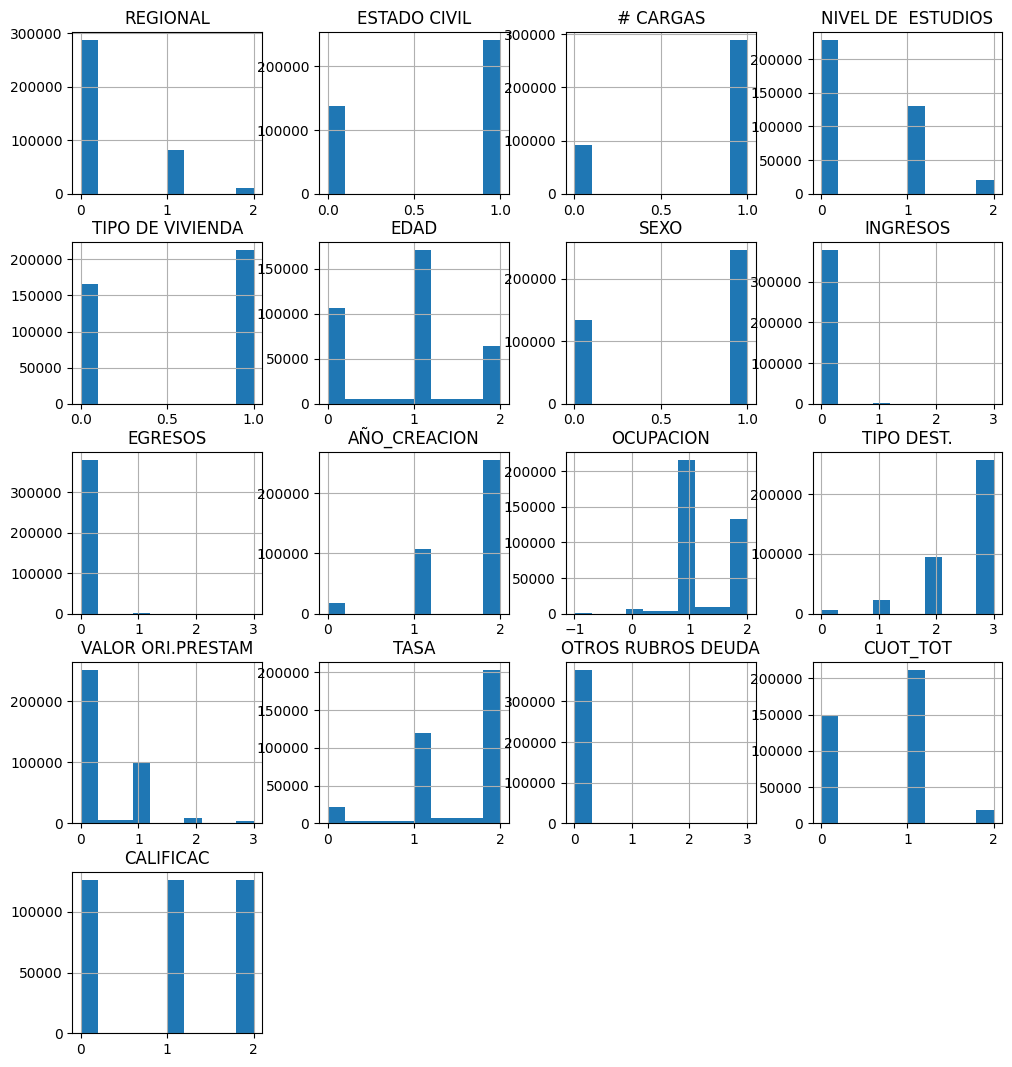

In [49]:
sm = SMOTE(random_state = 2)
x_values = encoded_dataset.iloc[:,0:16]
y_values = encoded_dataset.iloc[:,16]
x_balanced, y_balanced = sm.fit_resample(x_values, y_values)
balanced_dataset = x_balanced.copy()
balanced_dataset['CALIFICAC'] = y_balanced.copy()
balanced_dataset.info()
balanced_dataset.hist(grid=True, figsize=(12,13));

In [50]:
# Split train and test data

train,test=train_test_split(balanced_dataset, train_size=0.8, random_state = 1)
# Tomamos valores X e Y para entrenamiento
x_train = train.values[:,0:16]
y_train = train.values[:,16]
# Tomamos valores X e Y para testing
x_test = test.values[:,0:16]
y_test = test.values[:,16]

print(len(y_train))
len(y_test)

303928


75983

## ANN Modeling

En esta sección se modela y realiza pruebas manuales para determinar una arquitectura base de la red neuronal que se comporte de manera adecuada y coherente para nuestros datos, al ya tener buenos resultados se procederá a realizar la optimización de los hiperparámetros de la red neuronal

In [51]:
# Create model
model = Sequential()
model.add(Dense(16, input_dim=16, activation='selu'))
model.add(Dense(18, activation='relu'))
model.add(Dense(18,activation='tanh'))
# model.add(Dense(1,activation='sigmoid')) # for binary clasification
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='rmsprop', metrics=['accuracy'])

epochs = 50
 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                272       
                                                                 
 dense_1 (Dense)             (None, 18)                306       
                                                                 
 dense_2 (Dense)             (None, 18)                342       
                                                                 
 dense_3 (Dense)             (None, 3)                 57        
                                                                 
Total params: 977
Trainable params: 977
Non-trainable params: 0
_________________________________________________________________


In [52]:
# Train model
from keras.utils import np_utils

y_aux = np_utils.to_categorical(y_train)
history = model.fit(x_train, y_aux, epochs=epochs)
 
# Scores the model
scores = model.evaluate(x_train, y_aux)

# Printing results
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print (model.predict(x_train).round())

Epoch 1/50


2023-04-17 18:39:01.781231: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


9498/9498 [==============================] - 4s 371us/step - loss: 0.4081 - accuracy: 0.8214
Epoch 2/50
9498/9498 [==============================] - 4s 379us/step - loss: 0.2856 - accuracy: 0.8856
Epoch 3/50
9498/9498 [==============================] - 3s 366us/step - loss: 0.2387 - accuracy: 0.9092
Epoch 4/50
9498/9498 [==============================] - 3s 363us/step - loss: 0.2169 - accuracy: 0.9190
Epoch 5/50
9498/9498 [==============================] - 3s 363us/step - loss: 0.2041 - accuracy: 0.9250
Epoch 6/50
9498/9498 [==============================] - 3s 363us/step - loss: 0.1955 - accuracy: 0.9282
Epoch 7/50
9498/9498 [==============================] - 3s 361us/step - loss: 0.1899 - accuracy: 0.9310
Epoch 8/50
9498/9498 [==============================] - 3s 354us/step - loss: 0.1856 - accuracy: 0.9326
Epoch 9/50
9498/9498 [==============================] - 3s 359us/step - loss: 0.1827 - accuracy: 0.9341
Epoch 10/50
9498/9498 [==============================] - 3s 359us/step - lo

In [53]:
y_aux

array([[1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.]], dtype=float32)

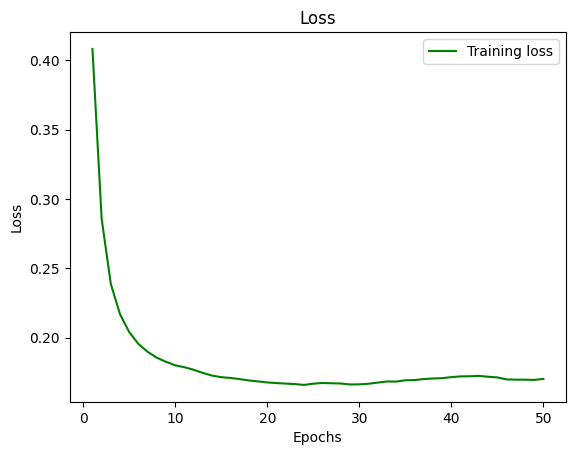

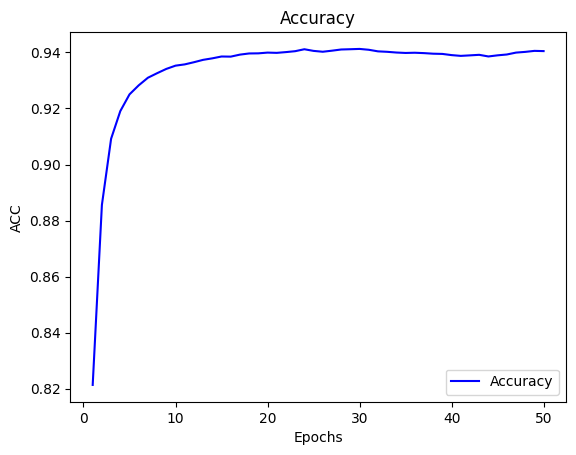

In [54]:
# Getting training metrics

# Gráfica de loss vs epochs
loss_train = history.history['loss']
acc = history.history['accuracy']
epochs_range = range(1, epochs+1)
plt.plot(epochs_range, loss_train, 'g', label='Training loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Gráfica de acc vs epochs
plt.plot(epochs_range, acc, 'b', label='Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('ACC')
plt.legend()
plt.show()

In [55]:
# Predictions and model evaluation

# test
y_pred_test = model.predict(x_test)
# redondeamos las predicciones
#rounded_y_pred_test = [round(x[0]) for x in y_pred_test] # for binary
y_classes = y_pred_test.argmax(axis=-1)
scores_test = model.evaluate(x_test, np_utils.to_categorical(y_test))
print("Accuracy con test: \n%s: %.2f%%" % (model.metrics_names[1], scores_test[1]*100))#Accuracy (exactitud)

2375/2375 [==============================] - 1s 307us/step - loss: 0.1697 - accuracy: 0.9391
Accuracy con test: 
accuracy: 93.91%


In [56]:
y_pred_test

y_classes = y_pred_test.argmax(axis=-1)
y_classes
print(y_classes)
print(len(y_classes))

[0 2 2 ... 2 0 1]
75983


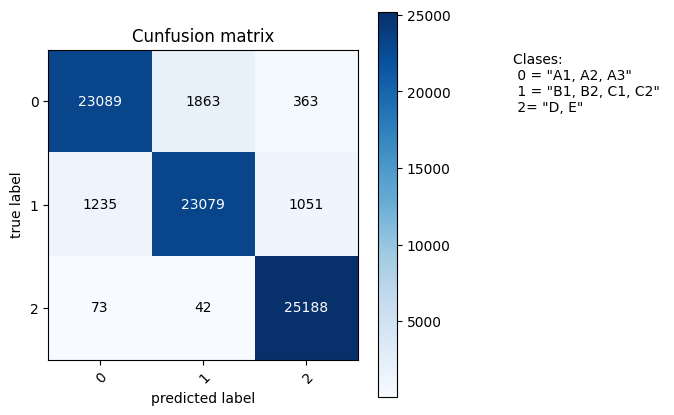

In [57]:
labels=[0, 1, 2]
title = 'Cunfusion matrix'

confMatrix = confusion_matrix(y_test, y_classes, labels=labels)

fig, ax = plot_confusion_matrix(confMatrix, 
                      class_names=labels,
                      colorbar=True,
                                figsize=(5,5)
                      )
ax.annotate(f'Clases: \n 0 = "A1, A2, A3" \n 1 = "B1, B2, C1, C2" \n 2= "D, E"', 
            xy = (1.5, 0.8), 
            xycoords='axes fraction')

plt.title(f'{title}')
#fig.tight_layout()
plt.show()


## ANN optimization

In [58]:
import numpy
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

In [59]:
def create_model(init_mode='uniform', optimizer='adam'):
    # define model
    model = Sequential()
    model.add(Dense(16, input_dim=16, activation='selu', kernel_initializer=init_mode))
    model.add(Dense(18, activation='relu', kernel_initializer=init_mode))
    model.add(Dense(18,activation='tanh', kernel_initializer=init_mode))
    model.add(Dense(3, activation='softmax', kernel_initializer=init_mode))
    # compile model
    model.compile(loss='categorical_crossentropy',optimizer=optimizer, metrics=['accuracy'])
    return model

In [60]:
seed = 7
numpy.random.seed(seed)
batch_size = 128
epochs = 15

model_CV = KerasClassifier(build_fn=create_model, epochs=epochs, 
                           batch_size=batch_size, verbose=1)

# define the grid search parameters

# init mode for initial neurons weight
init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 
             'he_normal', 'he_uniform']

# optimizers
optimizer = ['rmsprop','adam']

param_grid = dict(init_mode=init_mode, optimizer=optimizer)
grid = GridSearchCV(estimator=model_CV, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(x_train, y_train)

/var/folders/vk/jvp91hqs0_b948m658jpp7680000gn/T/ipykernel_43103/467923242.py:6: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model_CV = KerasClassifier(build_fn=create_model, epochs=epochs,
2023-04-17 18:42:16.664802: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-04-17 18:42:16.663213: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-04-17 18:42:16.666853: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-04-17 18:42:16.668396: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-04-17 18:42:16.676344: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-04-17 18:42:16.706032: W tensorflow/tsl/platform/profi

Epoch 1/15
Epoch 1/15
Epoch 1/15
Epoch 1/15
Epoch 1/15
Epoch 1/15
Epoch 1/15
Epoch 1/15
1583/1583 [==============================] - 4s 2ms/step - loss: 0.7850 - accuracy: 0.6180
Epoch 2/15
1583/1583 [==============================] - 4s 2ms/step - loss: 0.8185 - accuracy: 0.6013
Epoch 2/15
1583/1583 [==============================] - 4s 2ms/step - loss: 0.7659 - accuracy: 0.6372
Epoch 2/15
1583/1583 [==============================] - 4s 2ms/step - loss: 0.7849 - accuracy: 0.6133
Epoch 2/15
1583/1583 [==============================] - 4s 2ms/step - loss: 0.7817 - accuracy: 0.6285
Epoch 2/15
1583/1583 [==============================] - 4s 2ms/step - loss: 0.5695 - accuracy: 0.7434
Epoch 2/15
1583/1583 [==============================] - 4s 2ms/step - loss: 0.8252 - accuracy: 0.6052
Epoch 2/15
1583/1583 [==============================] - 2s 1ms/step - loss: 0.6061 - accuracy: 0.7263
Epoch 3/15
1583/1583 [==============================] - 2s 1ms/step - loss: 0.5398 - accuracy: 0.7571
Epoch

1583/1583 [==============================] - 2s 1ms/step - loss: 0.2960 - accuracy: 0.8814
Epoch 10/15
1583/1583 [==============================] - 2s 2ms/step - loss: 0.2866 - accuracy: 0.8816
Epoch 10/15
1583/1583 [==============================] - 3s 2ms/step - loss: 0.2952 - accuracy: 0.8774
Epoch 10/15
1583/1583 [==============================] - 2s 1ms/step - loss: 0.3321 - accuracy: 0.8562
Epoch 11/15
1583/1583 [==============================] - 2s 1ms/step - loss: 0.2156 - accuracy: 0.9190
Epoch 11/15
1583/1583 [==============================] - 2s 1ms/step - loss: 0.3008 - accuracy: 0.8779
Epoch 11/15
1583/1583 [==============================] - 2s 2ms/step - loss: 0.3155 - accuracy: 0.8633
Epoch 11/15
1583/1583 [==============================] - 2s 2ms/step - loss: 0.2846 - accuracy: 0.8871
Epoch 11/15
1583/1583 [==============================] - 3s 2ms/step - loss: 0.2758 - accuracy: 0.8877
Epoch 11/15
1583/1583 [==============================] - 3s 2ms/step - loss: 0.2870 -

1583/1583 [==============================] - 3s 2ms/step - loss: 0.4960 - accuracy: 0.7776
Epoch 3/15
1583/1583 [==============================] - 3s 2ms/step - loss: 0.3431 - accuracy: 0.8496
Epoch 4/15
1583/1583 [==============================] - 5s 2ms/step - loss: 0.7162 - accuracy: 0.6551
Epoch 2/15
1583/1583 [==============================] - 3s 2ms/step - loss: 0.4970 - accuracy: 0.7837
Epoch 3/15
1583/1583 [==============================] - 3s 2ms/step - loss: 0.3225 - accuracy: 0.8600
Epoch 4/15
1583/1583 [==============================] - 4s 2ms/step - loss: 0.2784 - accuracy: 0.8895
Epoch 4/15
1583/1583 [==============================] - 3s 2ms/step - loss: 0.4991 - accuracy: 0.7710
Epoch 3/15
1583/1583 [==============================] - 3s 2ms/step - loss: 0.4371 - accuracy: 0.8040
Epoch 4/15
1583/1583 [==============================] - 3s 2ms/step - loss: 0.3165 - accuracy: 0.8671
Epoch 5/15
1583/1583 [==============================] - 3s 2ms/step - loss: 0.4654 - accuracy

1583/1583 [==============================] - 3s 2ms/step - loss: 0.2092 - accuracy: 0.9235
Epoch 12/15
1583/1583 [==============================] - 3s 2ms/step - loss: 0.1953 - accuracy: 0.9277
Epoch 12/15
1583/1583 [==============================] - 3s 2ms/step - loss: 0.1931 - accuracy: 0.9295
Epoch 12/15
1583/1583 [==============================] - 2s 2ms/step - loss: 0.2793 - accuracy: 0.8879
Epoch 12/15
1583/1583 [==============================] - 2s 2ms/step - loss: 0.2603 - accuracy: 0.8965
Epoch 12/15
1583/1583 [==============================] - 2s 2ms/step - loss: 0.2077 - accuracy: 0.9211
Epoch 14/15
1583/1583 [==============================] - 2s 1ms/step - loss: 0.2692 - accuracy: 0.8932
Epoch 13/15
1583/1583 [==============================] - 3s 2ms/step - loss: 0.2787 - accuracy: 0.8873
Epoch 11/15
1583/1583 [==============================] - 3s 2ms/step - loss: 0.2033 - accuracy: 0.9255
Epoch 13/15
1583/1583 [==============================] - 3s 2ms/step - loss: 0.1886 -

1583/1583 [==============================] - 3s 2ms/step - loss: 1.0987 - accuracy: 0.3338
Epoch 5/15
1583/1583 [==============================] - 3s 2ms/step - loss: 0.3786 - accuracy: 0.8311
Epoch 6/15
1583/1583 [==============================] - 3s 2ms/step - loss: 1.0986 - accuracy: 0.3334
Epoch 3/15
1583/1583 [==============================] - 4s 2ms/step - loss: 1.0987 - accuracy: 0.3336
Epoch 5/15
1583/1583 [==============================] - 3s 2ms/step - loss: 1.0986 - accuracy: 0.3340
Epoch 6/15
1583/1583 [==============================] - 4s 2ms/step - loss: 1.0987 - accuracy: 0.3325
Epoch 6/15
1583/1583 [==============================] - 4s 2ms/step - loss: 0.3253 - accuracy: 0.8594
Epoch 6/15
1583/1583 [==============================] - 3s 2ms/step - loss: 0.3627 - accuracy: 0.8390
Epoch 7/15
1583/1583 [==============================] - 4s 2ms/step - loss: 1.0986 - accuracy: 0.3337
Epoch 4/15
1583/1583 [==============================] - 4s 2ms/step - loss: 1.0987 - accuracy

1583/1583 [==============================] - 3s 2ms/step - loss: 1.0987 - accuracy: 0.3329
Epoch 13/15
1583/1583 [==============================] - 3s 2ms/step - loss: 0.2464 - accuracy: 0.9050
Epoch 14/15
1583/1583 [==============================] - 3s 2ms/step - loss: 0.2618 - accuracy: 0.8961
Epoch 15/15
1583/1583 [==============================] - 3s 2ms/step - loss: 1.0986 - accuracy: 0.3339
Epoch 15/15
1583/1583 [==============================] - 3s 2ms/step - loss: 1.0986 - accuracy: 0.3345
Epoch 14/15
1583/1583 [==============================] - 3s 2ms/step - loss: 1.0987 - accuracy: 0.3335
Epoch 14/15
1583/1583 [==============================] - 3s 2ms/step - loss: 0.2402 - accuracy: 0.9078
Epoch 15/15
1583/1583 [==============================] - 3s 2ms/step - loss: 1.0986 - accuracy: 0.3358
Epoch 15/15
1583/1583 [==============================] - 3s 2ms/step - loss: 1.0986 - accuracy: 0.3333
Epoch 14/15
1583/1583 [==============================] - 4s 2ms/step - loss: 0.5124 -

1583/1583 [==============================] - 3s 2ms/step - loss: 0.2922 - accuracy: 0.8817
Epoch 5/15
1583/1583 [==============================] - 3s 2ms/step - loss: 0.3659 - accuracy: 0.8391
Epoch 3/15
1583/1583 [==============================] - 3s 2ms/step - loss: 0.2725 - accuracy: 0.8920
Epoch 7/15
1583/1583 [==============================] - 3s 2ms/step - loss: 0.2805 - accuracy: 0.8862
Epoch 5/15
1583/1583 [==============================] - 3s 2ms/step - loss: 0.2670 - accuracy: 0.8946
Epoch 7/15
1583/1583 [==============================] - 3s 2ms/step - loss: 0.2521 - accuracy: 0.9035
Epoch 6/15
1583/1583 [==============================] - 3s 2ms/step - loss: 0.2368 - accuracy: 0.9091
Epoch 7/15
1583/1583 [==============================] - 3s 2ms/step - loss: 0.3160 - accuracy: 0.8678
Epoch 4/15
1583/1583 [==============================] - 3s 2ms/step - loss: 0.2694 - accuracy: 0.8930
Epoch 6/15
1583/1583 [==============================] - 3s 2ms/step - loss: 0.2546 - accuracy

1583/1583 [==============================] - 2s 2ms/step - loss: 0.1777 - accuracy: 0.9357
Epoch 15/15
1583/1583 [==============================] - 3s 2ms/step - loss: 0.1933 - accuracy: 0.9299
Epoch 14/15
1583/1583 [==============================] - 3s 2ms/step - loss: 0.2023 - accuracy: 0.9252
Epoch 14/15
1583/1583 [==============================] - 3s 2ms/step - loss: 0.1964 - accuracy: 0.9279
Epoch 13/15
1583/1583 [==============================] - 3s 2ms/step - loss: 0.1895 - accuracy: 0.9311
Epoch 15/15
1583/1583 [==============================] - 3s 2ms/step - loss: 0.1894 - accuracy: 0.9319
Epoch 15/15
1583/1583 [==============================] - 3s 2ms/step - loss: 0.1984 - accuracy: 0.9261
Epoch 15/15
1583/1583 [==============================] - 3s 2ms/step - loss: 0.1919 - accuracy: 0.9297
Epoch 14/15
1583/1583 [==============================] - 5s 2ms/step - loss: 0.5601 - accuracy: 0.7492
Epoch 2/15
1583/1583 [==============================] - 4s 2ms/step - loss: 0.5671 - 

1583/1583 [==============================] - 3s 2ms/step - loss: 0.2194 - accuracy: 0.9172
Epoch 8/15
1583/1583 [==============================] - 3s 2ms/step - loss: 0.2444 - accuracy: 0.9063
Epoch 6/15
1583/1583 [==============================] - 3s 2ms/step - loss: 0.2545 - accuracy: 0.8998
Epoch 6/15
1583/1583 [==============================] - 3s 2ms/step - loss: 0.2431 - accuracy: 0.9040
Epoch 5/15
1583/1583 [==============================] - 3s 2ms/step - loss: 0.2263 - accuracy: 0.9153
Epoch 9/15
1583/1583 [==============================] - 3s 2ms/step - loss: 0.2409 - accuracy: 0.9060
Epoch 7/15
1583/1583 [==============================] - 3s 2ms/step - loss: 0.2109 - accuracy: 0.9212
Epoch 9/15
1583/1583 [==============================] - 4s 2ms/step - loss: 0.2185 - accuracy: 0.9193
Epoch 9/15
1583/1583 [==============================] - 3s 2ms/step - loss: 0.2292 - accuracy: 0.9130
Epoch 7/15
1583/1583 [==============================] - 3s 2ms/step - loss: 0.2401 - accuracy

1583/1583 [==============================] - 3s 2ms/step - loss: 0.1807 - accuracy: 0.9337
Epoch 15/15
1583/1583 [==============================] - 3s 2ms/step - loss: 0.1847 - accuracy: 0.9321
Epoch 15/15
1583/1583 [==============================] - 4s 2ms/step - loss: 0.5275 - accuracy: 0.7692
Epoch 2/15
1583/1583 [==============================] - 4s 2ms/step - loss: 0.5661 - accuracy: 0.7531
Epoch 2/15
1583/1583 [==============================] - 3s 2ms/step - loss: 0.3398 - accuracy: 0.8637
Epoch 3/15
1583/1583 [==============================] - 4s 2ms/step - loss: 0.5419 - accuracy: 0.7615
Epoch 2/15
1583/1583 [==============================] - 3s 2ms/step - loss: 0.1740 - accuracy: 0.9371
Epoch 15/15
1583/1583 [==============================] - 4s 2ms/step - loss: 0.5440 - accuracy: 0.7557
Epoch 2/15
1583/1583 [==============================] - 3s 2ms/step - loss: 0.3353 - accuracy: 0.8631
Epoch 3/15
1583/1583 [==============================] - 3s 2ms/step - loss: 0.2883 - accur

1583/1583 [==============================] - 3s 2ms/step - loss: 0.2585 - accuracy: 0.9000
Epoch 7/15
1583/1583 [==============================] - 3s 2ms/step - loss: 0.2595 - accuracy: 0.8932
Epoch 7/15
1583/1583 [==============================] - 3s 2ms/step - loss: 0.2457 - accuracy: 0.9051
Epoch 7/15
1583/1583 [==============================] - 3s 2ms/step - loss: 0.2284 - accuracy: 0.9155
Epoch 8/15
1583/1583 [==============================] - 3s 2ms/step - loss: 0.2107 - accuracy: 0.9225
Epoch 9/15
1116/1583 [====================>.........] - ETA: 0s - loss: 0.2412 - accuracy: 0.9080Epoch 9/15
Epoch 10/15
1583/1583 [==============================] - 3s 2ms/step - loss: 0.2455 - accuracy: 0.9059
Epoch 8/15
1583/1583 [==============================] - 3s 2ms/step - loss: 0.2494 - accuracy: 0.8982
Epoch 8/15
1583/1583 [==============================] - 3s 2ms/step - loss: 0.2393 - accuracy: 0.9089
Epoch 6/15
1583/1583 [==============================] - 3s 2ms/step - loss: 0.2215 - a

1583/1583 [==============================] - 3s 2ms/step - loss: 0.1841 - accuracy: 0.9308
Epoch 13/15
1583/1583 [==============================] - 2s 1ms/step - loss: 0.1807 - accuracy: 0.9317
Epoch 14/15
1583/1583 [==============================] - 1s 633us/step - loss: 0.1772 - accuracy: 0.9337
Epoch 15/15
792/792 [==============================] - 0s 336us/step - loss: 0.1732 - accuracy: 0.9365
Epoch 1/15
2375/2375 [==============================] - 2s 560us/step - loss: 0.4588 - accuracy: 0.8022
Epoch 2/15
2375/2375 [==============================] - 1s 553us/step - loss: 0.2956 - accuracy: 0.8805
Epoch 3/15
2375/2375 [==============================] - 1s 542us/step - loss: 0.2587 - accuracy: 0.8993
Epoch 4/15
2375/2375 [==============================] - 1s 538us/step - loss: 0.2361 - accuracy: 0.9094
Epoch 5/15
2375/2375 [==============================] - 1s 539us/step - loss: 0.2211 - accuracy: 0.9166
Epoch 6/15
2375/2375 [==============================] - 1s 477us/step - loss: 

In [61]:
printmd(f'**Mejor accuracy obtenido: {round(grid_result.best_score_,3)}**')
printmd(f'**Parámetros optimos: {grid_result.best_params_}**')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f' mean={mean:.4}, std={stdev:.4} using {param}')

**Mejor accuracy obtenido: 0.937**

**Parámetros optimos: {'init_mode': 'he_normal', 'optimizer': 'adam'}**

 mean=0.8992, std=0.009629 using {'init_mode': 'uniform', 'optimizer': 'rmsprop'}
 mean=0.9009, std=0.008722 using {'init_mode': 'uniform', 'optimizer': 'adam'}
 mean=0.9289, std=0.003887 using {'init_mode': 'lecun_uniform', 'optimizer': 'rmsprop'}
 mean=0.9342, std=0.002212 using {'init_mode': 'lecun_uniform', 'optimizer': 'adam'}
 mean=0.9064, std=0.002657 using {'init_mode': 'normal', 'optimizer': 'rmsprop'}
 mean=0.9069, std=0.005671 using {'init_mode': 'normal', 'optimizer': 'adam'}
 mean=0.3339, std=0.0007411 using {'init_mode': 'zero', 'optimizer': 'rmsprop'}
 mean=0.3334, std=0.0006943 using {'init_mode': 'zero', 'optimizer': 'adam'}
 mean=0.9311, std=0.0007579 using {'init_mode': 'glorot_normal', 'optimizer': 'rmsprop'}
 mean=0.93, std=0.005782 using {'init_mode': 'glorot_normal', 'optimizer': 'adam'}
 mean=0.9331, std=0.002215 using {'init_mode': 'glorot_uniform', 'optimizer': 'rmsprop'}
 mean=0.9347, std=0.002315 using {'init_mode': 'glorot_uniform', 'optimizer': 'adam'}
 me

Tras haber realizado la pruebas se procede a realizar la construcción del modelo final con los hiperparámetros mejor valorados

In [62]:
final_model = create_model(init_mode='glorot_uniform', optimizer='adam')
final_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 16)                272       
                                                                 
 dense_9 (Dense)             (None, 18)                306       
                                                                 
 dense_10 (Dense)            (None, 18)                342       
                                                                 
 dense_11 (Dense)            (None, 3)                 57        
                                                                 
Total params: 977
Trainable params: 977
Non-trainable params: 0
_________________________________________________________________


In [63]:
epochs = 50
model = final_model

y_aux = np_utils.to_categorical(y_train)
history = model.fit(x_train, y_aux, epochs=epochs)
 
# Scores the model
scores = model.evaluate(x_train, y_aux)

# Printing results
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print (model.predict(x_train).round())

Epoch 1/50
9498/9498 [==============================] - 4s 438us/step - loss: 0.3969 - accuracy: 0.8335
Epoch 2/50
9498/9498 [==============================] - 4s 438us/step - loss: 0.2700 - accuracy: 0.8947
Epoch 3/50
9498/9498 [==============================] - 4s 446us/step - loss: 0.2350 - accuracy: 0.9122
Epoch 4/50
9498/9498 [==============================] - 4s 441us/step - loss: 0.2135 - accuracy: 0.9208
Epoch 5/50
9498/9498 [==============================] - 4s 441us/step - loss: 0.1978 - accuracy: 0.9269
Epoch 6/50
9498/9498 [==============================] - 4s 439us/step - loss: 0.1878 - accuracy: 0.9305
Epoch 7/50
9498/9498 [==============================] - 4s 438us/step - loss: 0.1823 - accuracy: 0.9331
Epoch 8/50
9498/9498 [==============================] - 4s 443us/step - loss: 0.1767 - accuracy: 0.9351
Epoch 9/50
9498/9498 [==============================] - 4s 438us/step - loss: 0.1717 - accuracy: 0.9371
Epoch 10/50
9498/9498 [==============================] - 4s 443u

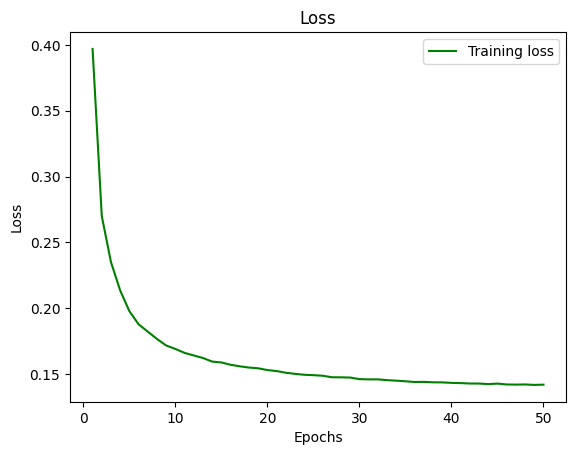

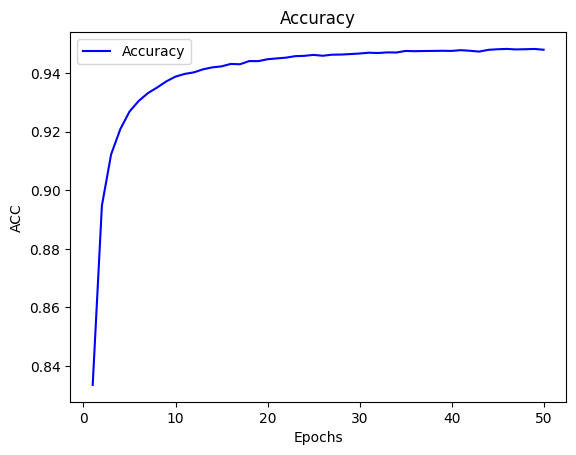

In [64]:
# Getting training metrics

# Gráfica de loss vs epochs
loss_train = history.history['loss']
acc = history.history['accuracy']
epochs_range = range(1, epochs+1)
plt.plot(epochs_range, loss_train, 'g', label='Training loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Gráfica de acc vs epochs
plt.plot(epochs_range, acc, 'b', label='Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('ACC')
plt.legend()
plt.show()

## Resultados

Tras obtener el entrenamiento final con sus resultados en el conjunto de test podemos procedemos a visualizar la arquitectura final del modelo

In [65]:
# Plotting ANN architecture
from ann_visualizer.visualize import ann_viz
from IPython.display import IFrame

ann_viz(final_model, view=True, filename='construct_model', title='ANN_Simple_Architecture')
IFrame("./construct_model.pdf", width=980, height=400)


The application cannot be opened for an unexpected reason, error=Error Domain=NSOSStatusErrorDomain Code=-10673 "(null)" UserInfo={_LSLine=3863, _LSFunction=_LSOpenStuffCallLocal}
The application cannot be opened for an unexpected reason, error=Error Domain=NSOSStatusErrorDomain Code=-10673 "(null)" UserInfo={_LSLine=3863, _LSFunction=_LSOpenStuffCallLocal}


<br>

**Métricas de rendimiento en el modelo final**

Accuracy en los datos de testing para el modelo final

In [66]:
# Predictions and model evaluation in test set

# test
y_pred_test = model.predict(x_test)
# redondeamos las predicciones
#rounded_y_pred_test = [round(x[0]) for x in y_pred_test] # for binary
y_classes = y_pred_test.argmax(axis=-1)
scores_test = model.evaluate(x_test, np_utils.to_categorical(y_test))
print("Accuracy con test: \n%s: %.2f%%" % (model.metrics_names[1], scores_test[1]*100))#Accuracy (exactitud)

2375/2375 [==============================] - 1s 299us/step - loss: 0.1479 - accuracy: 0.9419
Accuracy con test: 
accuracy: 94.19%


Matriz de confusión para el modelo final para observar su exactitud

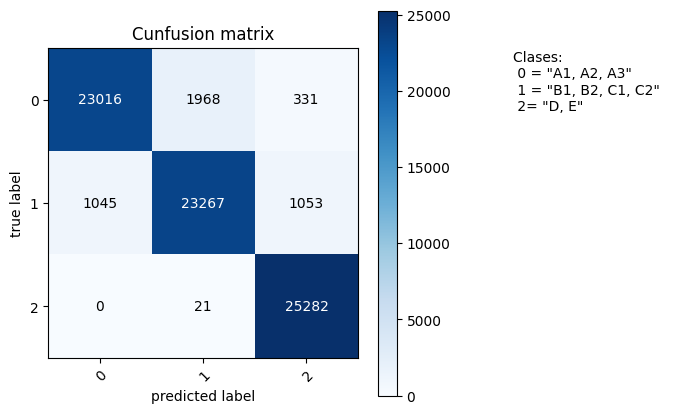

In [67]:
labels=[0, 1, 2]
title = 'Cunfusion matrix'

confMatrix = confusion_matrix(y_test, y_classes, labels=labels)

fig, ax = plot_confusion_matrix(confMatrix, 
                      class_names=labels,
                      colorbar=True,
                                figsize=(5,5)
                      )
ax.annotate(f'Clases: \n 0 = "A1, A2, A3" \n 1 = "B1, B2, C1, C2" \n 2= "D, E"', 
            xy = (1.5, 0.8), 
            xycoords='axes fraction')

plt.title(f'{title}')
#fig.tight_layout()
plt.show()

### Relaciones en resultados

In [90]:
total_predictions_len = len(y_classes)

Para poder representar las relaciones entre algunas variables y las predicciones generadas por el modelo requerimos crear un dataframe exclusivo con las entradas de los test y sus predicciones.

In [74]:
plot_predictions_df = test[['SEXO','NIVEL DE  ESTUDIOS', '# CARGAS', 'TIPO DE VIVIENDA', 'ESTADO CIVIL']].copy()
plot_predictions_df['CALIFICAC'] = y_classes[:]
plot_predictions_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 75983 entries, 108237 to 234705
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   SEXO                75983 non-null  int64
 1   NIVEL DE  ESTUDIOS  75983 non-null  int64
 2   # CARGAS            75983 non-null  int64
 3   TIPO DE VIVIENDA    75983 non-null  int64
 4   ESTADO CIVIL        75983 non-null  int64
 5   CALIFICAC           75983 non-null  int64
dtypes: int64(6)
memory usage: 4.1 MB


Ahora que tenemos un dataframe con la información requerida se harán las busquedas necesarias para generar las  agrupaciones para obtener los procentajes respectivos

#### Relación calificación vs sexo

In [101]:
# Group and create info for plotting

# SEXO VS CALIFICACIÓN
mujeres_calific_0 = len(plot_predictions_df.loc[ 
                        (plot_predictions_df['SEXO'] == 0) & (plot_predictions_df['CALIFICAC'] == 0) 
                    ])

mujeres_calific_1 = len(plot_predictions_df.loc[
                        (plot_predictions_df['SEXO'] == 0) & (plot_predictions_df['CALIFICAC'] == 1)
                    ])

mujeres_calific_2 = len(plot_predictions_df.loc[
                        (plot_predictions_df['SEXO'] == 0) & (plot_predictions_df['CALIFICAC'] == 2)
                    ])


hombres_calific_0 = len(plot_predictions_df.loc[ 
                        (plot_predictions_df['SEXO'] == 1) & (plot_predictions_df['CALIFICAC'] == 0) 
                    ])

hombres_calific_1 = len(plot_predictions_df.loc[
                        (plot_predictions_df['SEXO'] == 1) & (plot_predictions_df['CALIFICAC'] == 1)
                    ])

hombres_calific_2 = len(plot_predictions_df.loc[
                        (plot_predictions_df['SEXO'] == 1) & (plot_predictions_df['CALIFICAC'] == 2)
                    ])

mujeres_calificacion = [mujeres_calific_0, mujeres_calific_1, mujeres_calific_2]
mujeres_calificacion = list(map(lambda x: round(x/total_predictions_len*100,2), mujeres_calificacion))
hombres_calificacion = [hombres_calific_0, hombres_calific_1, hombres_calific_2]
hombres_calificacion = list(map(lambda x: round(x/total_predictions_len*100,2), hombres_calificacion))

print(mujeres_calificacion)
print(hombres_calificacion)

[14.75, 13.57, 6.85]
[16.91, 19.67, 28.25]


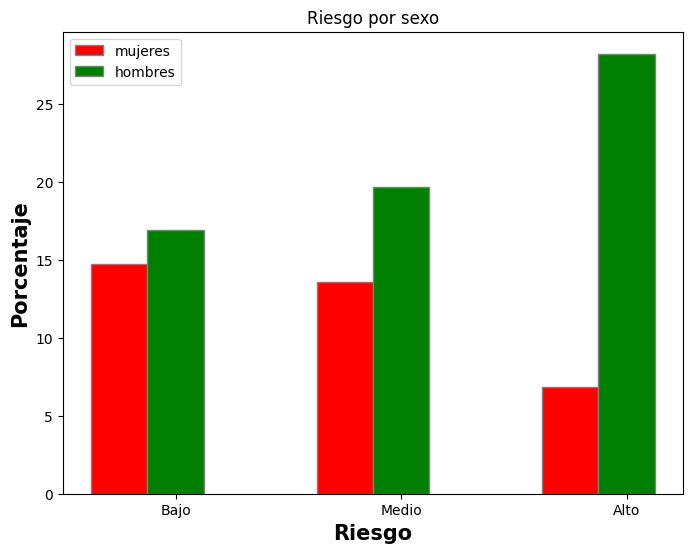

In [117]:
# Set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(8, 6))
 
# set height of bar
mujeres = mujeres_calificacion
hombres = hombres_calificacion
 
# Set position of bar on X axis
br1 = np.arange(len(mujeres))
br2 = [x + 0.25 for x in br1]

# Make the plot
plt.bar(br1, mujeres, color ='r', width = barWidth,
        edgecolor ='grey', label ='mujeres')
plt.bar(br2, hombres, color ='g', width = barWidth,
        edgecolor ='grey', label ='hombres')

 
# Adding Xticks
plt.xlabel('Riesgo', fontweight ='bold', fontsize = 15)
plt.ylabel('Porcentaje', fontweight ='bold', fontsize = 15)
plt.xticks([x + barWidth for x in range(len(mujeres))],
        ['Bajo', 'Medio', 'Alto',])

plt.title('Riesgo por sexo')
plt.legend()
plt.show()

#### Relación calificación vs nivel de educación

In [120]:
# Nivel educación VS CALIFICACIÓN

# sin estudios o primaria
primaria_sin_estu_calific_0 = len(plot_predictions_df.loc[ 
                        (plot_predictions_df['NIVEL DE  ESTUDIOS'] == 0) & (plot_predictions_df['CALIFICAC'] == 0) 
                    ])

primaria_sin_estu_calific_1 = len(plot_predictions_df.loc[
                        (plot_predictions_df['NIVEL DE  ESTUDIOS'] == 0) & (plot_predictions_df['CALIFICAC'] == 1)
                    ])

primaria_sin_estu_calific_2 = len(plot_predictions_df.loc[
                        (plot_predictions_df['NIVEL DE  ESTUDIOS'] == 0) & (plot_predictions_df['CALIFICAC'] == 2)
                    ])

# secundario o técnico

secundario_tecnico_calific_0 = len(plot_predictions_df.loc[ 
                        (plot_predictions_df['NIVEL DE  ESTUDIOS'] == 1) & (plot_predictions_df['CALIFICAC'] == 0) 
                    ])

secundario_tecnico_calific_1 = len(plot_predictions_df.loc[
                        (plot_predictions_df['NIVEL DE  ESTUDIOS'] == 1) & (plot_predictions_df['CALIFICAC'] == 1)
                    ])

secundario_tecnico_calific_2 = len(plot_predictions_df.loc[
                        (plot_predictions_df['NIVEL DE  ESTUDIOS'] == 1) & (plot_predictions_df['CALIFICAC'] == 2)
                    ])

# postgrado o universitario

postgrado_universitaria_calific_0 = len(plot_predictions_df.loc[ 
                        (plot_predictions_df['NIVEL DE  ESTUDIOS'] == 2) & (plot_predictions_df['CALIFICAC'] == 0) 
                    ])

postgrado_universitaria_calific_1 = len(plot_predictions_df.loc[
                        (plot_predictions_df['NIVEL DE  ESTUDIOS'] == 2) & (plot_predictions_df['CALIFICAC'] == 1)
                    ])

postgrado_universitaria_calific_2 = len(plot_predictions_df.loc[
                        (plot_predictions_df['NIVEL DE  ESTUDIOS'] == 2) & (plot_predictions_df['CALIFICAC'] == 2)
                    ])

nivel_estudios_bajo = [primaria_sin_estu_calific_0, primaria_sin_estu_calific_1, primaria_sin_estu_calific_2]
nivel_estudios_bajo = list(map(lambda x: round(x/total_predictions_len*100,2), nivel_estudios_bajo))

nivel_estudios_medio = [secundario_tecnico_calific_0, secundario_tecnico_calific_1, secundario_tecnico_calific_2]
nivel_estudios_medio = list(map(lambda x: round(x/total_predictions_len*100,2), nivel_estudios_medio))

nivel_estudios_alto = [postgrado_universitaria_calific_0, postgrado_universitaria_calific_1, postgrado_universitaria_calific_2]
nivel_estudios_alto = list(map(lambda x: round(x/total_predictions_len*100,2), nivel_estudios_alto))

print(nivel_estudios_bajo)
print(nivel_estudios_medio)
print(nivel_estudios_alto)

[16.17, 16.64, 26.99]
[12.92, 13.73, 8.1]
[2.57, 2.87, 0.0]


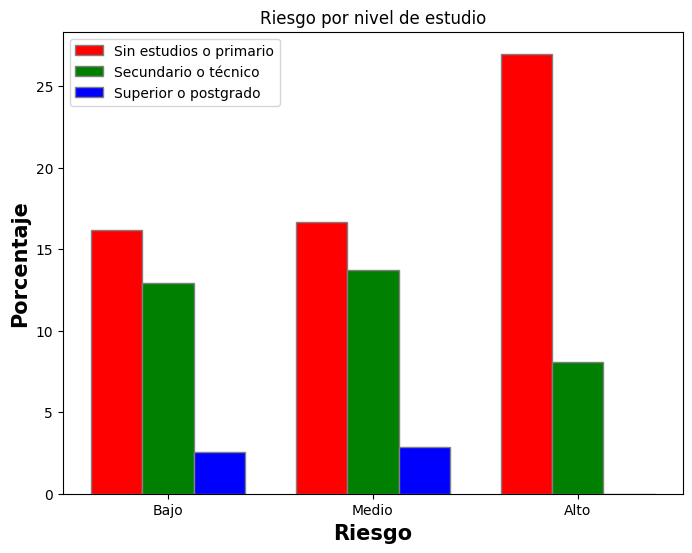

In [131]:
# Set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(8, 6))
 
# set height of bar
estudios_bajo = nivel_estudios_bajo
estudios_medio = nivel_estudios_medio
estudios_alto = nivel_estudios_alto
 
# Set position of bar on X axis
br1 = np.arange(len(mujeres))
br2 = [x + 0.25 for x in br1]
br3 = [x + 0.25 for x in br2]

# Make the plot
plt.bar(br1, estudios_bajo, color ='r', width = barWidth,
        edgecolor ='grey', label ='Sin estudios o primario')
plt.bar(br2, estudios_medio, color ='g', width = barWidth,
        edgecolor ='grey', label ='Secundario o técnico')
plt.bar(br3, estudios_alto, color ='b', width = barWidth,
        edgecolor ='grey', label ='Superior o postgrado')

 
# Adding Xticks
plt.xlabel('Riesgo', fontweight ='bold', fontsize = 15)
plt.ylabel('Porcentaje', fontweight ='bold', fontsize = 15)
plt.xticks([x + barWidth for x in range(len(estudios_bajo))],
        ['Bajo', 'Medio', 'Alto',])

plt.title('Riesgo por nivel de estudio')
plt.legend()
plt.show()


#### Relación calificación vs número de cargas

In [128]:
# calificación vs número de cargas

sin_cargas_calific_0 = len(plot_predictions_df.loc[ 
                        (plot_predictions_df['# CARGAS'] == 0) & (plot_predictions_df['CALIFICAC'] == 0) 
                    ])

sin_cargas_calific_1 = len(plot_predictions_df.loc[
                        (plot_predictions_df['# CARGAS'] == 0) & (plot_predictions_df['CALIFICAC'] == 1)
                    ])

sin_cargas_calific_2 = len(plot_predictions_df.loc[
                        (plot_predictions_df['# CARGAS'] == 0) & (plot_predictions_df['CALIFICAC'] == 2)
                    ])


con_cargas_calific_0 = len(plot_predictions_df.loc[ 
                        (plot_predictions_df['# CARGAS'] == 1) & (plot_predictions_df['CALIFICAC'] == 0) 
                    ])

con_cargas_calific_1 = len(plot_predictions_df.loc[
                        (plot_predictions_df['# CARGAS'] == 1) & (plot_predictions_df['CALIFICAC'] == 1)
                    ])

con_cargas_calific_2 = len(plot_predictions_df.loc[
                        (plot_predictions_df['# CARGAS'] == 1) & (plot_predictions_df['CALIFICAC'] == 2)
                    ])

sin_cargas_calificacion = [sin_cargas_calific_0, sin_cargas_calific_1, sin_cargas_calific_2]
sin_cargas_calificacion = list(map(lambda x: round(x/total_predictions_len*100,2), sin_cargas_calificacion))
con_cargas_calificacion = [con_cargas_calific_0, con_cargas_calific_1, con_cargas_calific_2]
con_cargas_calificacion = list(map(lambda x: round(x/total_predictions_len*100,2), con_cargas_calificacion))

print(sin_cargas_calificacion)
print(con_cargas_calificacion)

[7.62, 7.72, 8.36]
[24.04, 25.52, 26.74]


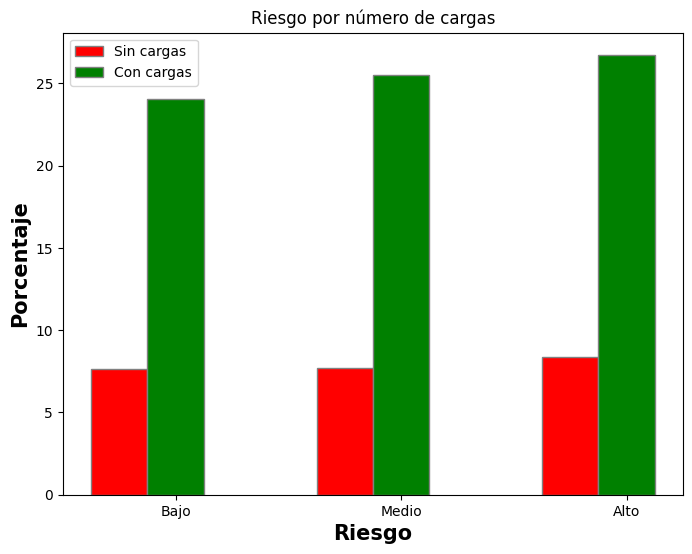

In [130]:
# Set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(8, 6))
 
# set height of bar
sin_cargas = sin_cargas_calificacion
con_cargas = con_cargas_calificacion
 
# Set position of bar on X axis
br1 = np.arange(len(mujeres))
br2 = [x + 0.25 for x in br1]

# Make the plot
plt.bar(br1, sin_cargas, color ='r', width = barWidth,
        edgecolor ='grey', label ='Sin cargas')
plt.bar(br2, con_cargas, color ='g', width = barWidth,
        edgecolor ='grey', label ='Con cargas')

 
# Adding Xticks
plt.xlabel('Riesgo', fontweight ='bold', fontsize = 15)
plt.ylabel('Porcentaje', fontweight ='bold', fontsize = 15)
plt.xticks([x + barWidth for x in range(len(sin_cargas))],
        ['Bajo', 'Medio', 'Alto',])

plt.title('Riesgo por número de cargas')
plt.legend()
plt.show()

#### Relación calificación vs tipo de vivienda

In [129]:
# calificación vs tipo de vivienda
vivienda_propia_calific_0 = len(plot_predictions_df.loc[ 
                        (plot_predictions_df['TIPO DE VIVIENDA'] == 0) & (plot_predictions_df['CALIFICAC'] == 0) 
                    ])

vivienda_propia_calific_1 = len(plot_predictions_df.loc[
                        (plot_predictions_df['TIPO DE VIVIENDA'] == 0) & (plot_predictions_df['CALIFICAC'] == 1)
                    ])

vivienda_propia_calific_2 = len(plot_predictions_df.loc[
                        (plot_predictions_df['TIPO DE VIVIENDA'] == 0) & (plot_predictions_df['CALIFICAC'] == 2)
                    ])


vivienda_no_propia_calific_0 = len(plot_predictions_df.loc[ 
                        (plot_predictions_df['TIPO DE VIVIENDA'] == 1) & (plot_predictions_df['CALIFICAC'] == 0) 
                    ])

vivienda_no_propia_calific_1 = len(plot_predictions_df.loc[
                        (plot_predictions_df['TIPO DE VIVIENDA'] == 1) & (plot_predictions_df['CALIFICAC'] == 1)
                    ])

vivienda_no_propia_calific_2 = len(plot_predictions_df.loc[
                        (plot_predictions_df['TIPO DE VIVIENDA'] == 1) & (plot_predictions_df['CALIFICAC'] == 2)
                    ])

vivienda_propia_calificacion = [vivienda_propia_calific_0, vivienda_propia_calific_1, vivienda_propia_calific_2]
vivienda_propia_calificacion = list(map(lambda x: round(x/total_predictions_len*100,2), vivienda_propia_calificacion))

vivienda_no_propia_calificacion = [con_cargas_calific_0, con_cargas_calific_1, vivienda_no_propia_calific_2]
vivienda_no_propia_calificacion = list(map(lambda x: round(x/total_predictions_len*100,2), vivienda_no_propia_calificacion))

print(vivienda_propia_calificacion)
print(vivienda_no_propia_calificacion)

[14.15, 15.32, 14.33]
[24.04, 25.52, 20.76]


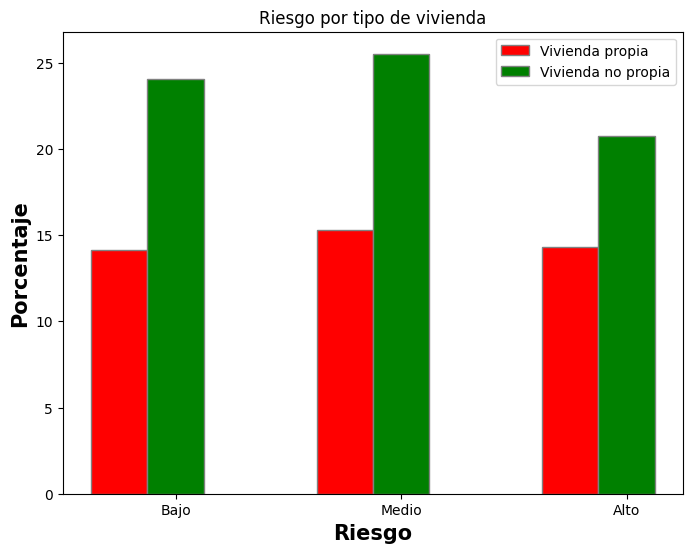

In [132]:
# Set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(8, 6))
 
# set height of bar
vivienda_propia = vivienda_propia_calificacion
vivienda_no_propia = vivienda_no_propia_calificacion
 
# Set position of bar on X axis
br1 = np.arange(len(vivienda_propia))
br2 = [x + 0.25 for x in br1]

# Make the plot
plt.bar(br1, vivienda_propia, color ='r', width = barWidth,
        edgecolor ='grey', label ='Vivienda propia')
plt.bar(br2, vivienda_no_propia, color ='g', width = barWidth,
        edgecolor ='grey', label ='Vivienda no propia')

 
# Adding Xticks
plt.xlabel('Riesgo', fontweight ='bold', fontsize = 15)
plt.ylabel('Porcentaje', fontweight ='bold', fontsize = 15)
plt.xticks([x + barWidth for x in range(len(vivienda_propia))],
        ['Bajo', 'Medio', 'Alto',])

plt.title('Riesgo por tipo de vivienda')
plt.legend()
plt.show()

#### Relación calificación vs estado civil

In [133]:
# calificación vs estado civil

soltero_union_libre_calific_0 = len(plot_predictions_df.loc[ 
                        (plot_predictions_df['ESTADO CIVIL'] == 0) & (plot_predictions_df['CALIFICAC'] == 0) 
                    ])

soltero_union_libre_calific_1 = len(plot_predictions_df.loc[
                        (plot_predictions_df['ESTADO CIVIL'] == 0) & (plot_predictions_df['CALIFICAC'] == 1)
                    ])

soltero_union_libre_calific_2 = len(plot_predictions_df.loc[
                        (plot_predictions_df['ESTADO CIVIL'] == 0) & (plot_predictions_df['CALIFICAC'] == 2)
                    ])


casado_divorciado_viudo_calific_0 = len(plot_predictions_df.loc[ 
                        (plot_predictions_df['ESTADO CIVIL'] == 1) & (plot_predictions_df['CALIFICAC'] == 0) 
                    ])

casado_divorciado_viudo_calific_1 = len(plot_predictions_df.loc[
                        (plot_predictions_df['ESTADO CIVIL'] == 1) & (plot_predictions_df['CALIFICAC'] == 1)
                    ])

casado_divorciado_viudo_calific_2 = len(plot_predictions_df.loc[
                        (plot_predictions_df['ESTADO CIVIL'] == 1) & (plot_predictions_df['CALIFICAC'] == 2)
                    ])

soltero_union_libre_calificacion = [soltero_union_libre_calific_0, soltero_union_libre_calific_1, soltero_union_libre_calific_2]
soltero_union_libre_calificacion = list(map(lambda x: round(x/total_predictions_len*100,2), soltero_union_libre_calificacion))

casado_divorciado_viudo_calificacion = [casado_divorciado_viudo_calific_0, casado_divorciado_viudo_calific_1, casado_divorciado_viudo_calific_2]
casado_divorciado_viudo_calificacion = list(map(lambda x: round(x/total_predictions_len*100,2), casado_divorciado_viudo_calificacion))

print(soltero_union_libre_calificacion)
print(casado_divorciado_viudo_calificacion)

[12.78, 12.78, 10.8]
[18.88, 20.46, 24.29]


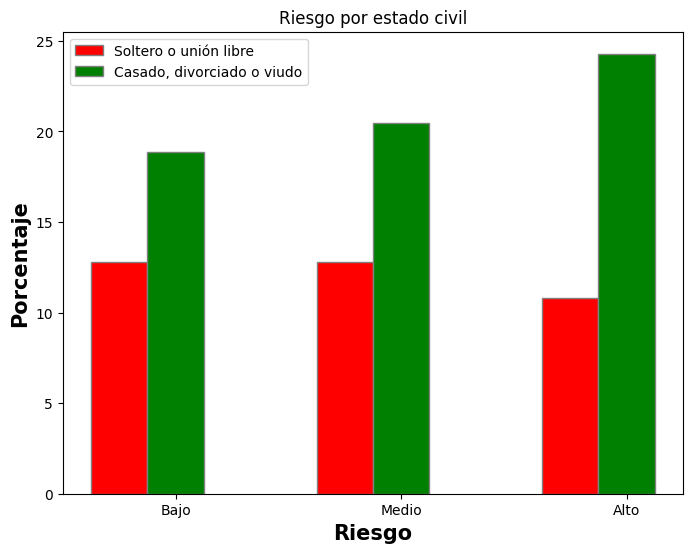

In [134]:
# Set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(8, 6))
 
# set height of bar
soltero_union_libre = soltero_union_libre_calificacion
casado_divorciado_viudo = casado_divorciado_viudo_calificacion
 
# Set position of bar on X axis
br1 = np.arange(len(soltero_union_libre))
br2 = [x + 0.25 for x in br1]

# Make the plot
plt.bar(br1, soltero_union_libre, color ='r', width = barWidth,
        edgecolor ='grey', label ='Soltero o unión libre')
plt.bar(br2, casado_divorciado_viudo, color ='g', width = barWidth,
        edgecolor ='grey', label ='Casado, divorciado o viudo')

 
# Adding Xticks
plt.xlabel('Riesgo', fontweight ='bold', fontsize = 15)
plt.ylabel('Porcentaje', fontweight ='bold', fontsize = 15)
plt.xticks([x + barWidth for x in range(len(soltero_union_libre))],
        ['Bajo', 'Medio', 'Alto',])

plt.title('Riesgo por estado civil')
plt.legend()
plt.show()